In [235]:
install.packages("tidyverse")
# Install and load the IRdisplay package
install.packages("IRdisplay")
library(tibble)
library(dplyr)
library(ggplot2)

library(IRdisplay)
library(tidyverse)


Die heruntergeladenen Bin"arpakete sind in 
	/var/folders/t0/f054bgvj7d514yq2qlg1czv80000gp/T//RtmpEjhJYK/downloaded_packages

Die heruntergeladenen Bin"arpakete sind in 
	/var/folders/t0/f054bgvj7d514yq2qlg1czv80000gp/T//RtmpEjhJYK/downloaded_packages


In [236]:
#####################################################
# Descriptive Statistics: Chess Players
# Solution
#
# File: des_stat_chess_sol.R
#
###################################################### 
# An experiment compared the ability of three groups of
# participants to remember briefly-presented chess 
# positions. The data are shown below. The numbers 
# represent the number of pieces correctly remembered 
# from three chess positions. 
# Compare the performance for each group by computing 
# mean, median, min, max, quartils, interquartil range, 
# variance. Create side-by-side box plots for these 
# three groups. What can you say about the differences
# between these groups from the box plots?

data1 <- tibble(
    type = c(rep("non-player",10), rep("beginner",10),rep("tournament",10)),
    res = c(22.1,22.3,26.2,29.6,31.7,33.5,38.9,39.7,43.2,43.2,
            32.5,37.1,39.1,40.5,45.5,51.3,52.6,55.7,55.9,57.7,
            40.1,45.6,51.2,56.4,58.1,71.1,74.9,75.9,80.3,85.3))
data1

type,res
<chr>,<dbl>
non-player,22.1
non-player,22.3
non-player,26.2
non-player,29.6
non-player,31.7
non-player,33.5
non-player,38.9
non-player,39.7
non-player,43.2


In [237]:
# alternative: tidy the messy dataset data
data1 %>% 
  as_tibble() %>%
  gather(key = "type", value = "res")

measures <- data1 %>%
  group_by(type) %>%
  summarise(Min = min(res),Max=max(res), # nolint
            q1=quantile(res,0.25,type=1),q2=quantile(res,0.5,type=1), # nolint
            q3=quantile(res,0.75,type=1),
            Mean=mean(res),variance=var(res),
            interquartile_range=q3-q1)
measures

type,res
<chr>,<dbl>
non-player,22.1
non-player,22.3
non-player,26.2
non-player,29.6
non-player,31.7
non-player,33.5
non-player,38.9
non-player,39.7
non-player,43.2


type,Min,Max,q1,q2,q3,Mean,variance,interquartile_range
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
beginner,32.5,57.7,39.1,45.5,55.7,46.79,81.55211,16.6
non-player,22.1,43.2,26.2,31.7,39.7,33.04,64.53378,13.5
tournament,40.1,85.3,51.2,58.1,75.9,63.89,244.02989,24.7


# Calculation of Mean

The mean, often denoted as \( \mu \), is a measure of central tendency that represents the average value of a dataset. It is calculated using the formula:

\[
\mu = \frac{1}{n} \sum_{i=1}^{n} x_i
\]

Where:
- \( \mu \) is the mean
- \( n \) is the total number of values in the dataset
- \( x_i \) are the individual values in the dataset

This formula sums up all the values in the dataset and divides by the total number of values to obtain the average value.

The mean is a fundamental statistical measure and is widely used in various fields for data analysis and interpretation.


<font color="red" face="Arial, sans-serif">For some reason this isn't working</font>

In [238]:
# Boxplots

#boxplot(data1[1],data1[2], names=colnames(data1),
#        main = "side by side boxplots",
#        xlab = "player type", ylab = "rem. chess positions")


In [239]:
# Boxplots -doesn't work for some strange reason
#boxplot(data1$type, data1$res, names = colnames(data1)[c(1, 2)],
##       main = "side by side boxplots",#
#        xlab = "player type", ylab = "rem. chess positions")

In [240]:
# Boxplots
#boxplot(pull(data1, type), pull(data1, res), names = colnames(data1)[c(1, 2)],
#        main = "side by side boxplots",
#        xlab = "player type", ylab = "rem. chess positions")

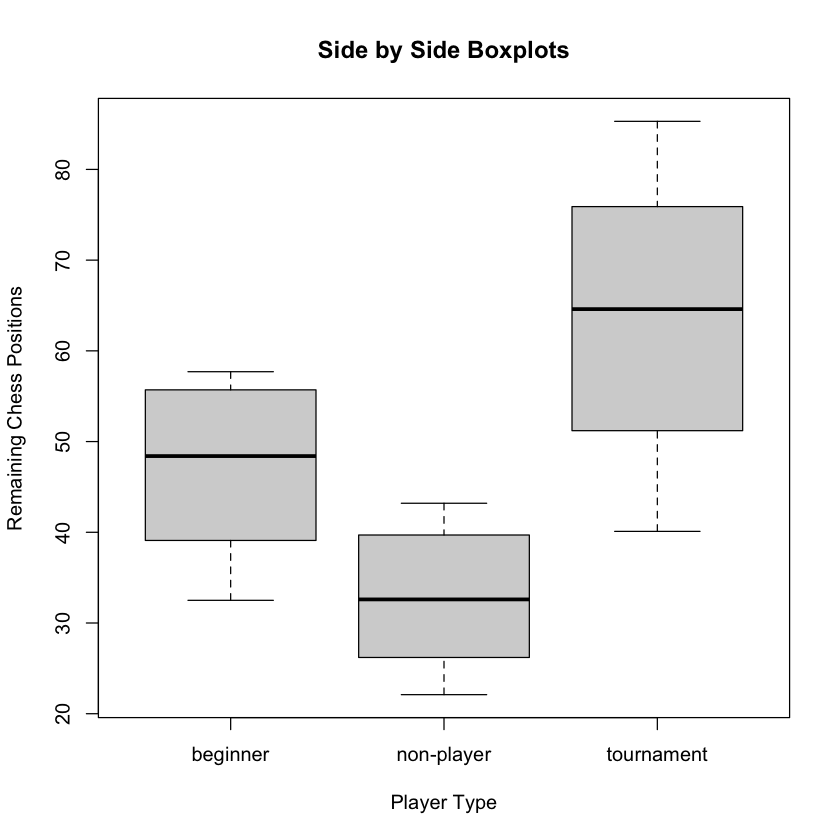

In [241]:
# Boxplots
boxplot(data1$res ~ data1$type,
        main = "Side by Side Boxplots",
        xlab = "Player Type", ylab = "Remaining Chess Positions")


In [242]:
# solution with ggplot()
# changing the order in the side by side boxplots by adding a factor to type
data1$type <- factor(data1$type, levels = c("non-player", "beginner","tournament"))
data1

type,res
<fct>,<dbl>
non-player,22.1
non-player,22.3
non-player,26.2
non-player,29.6
non-player,31.7
non-player,33.5
non-player,38.9
non-player,39.7
non-player,43.2


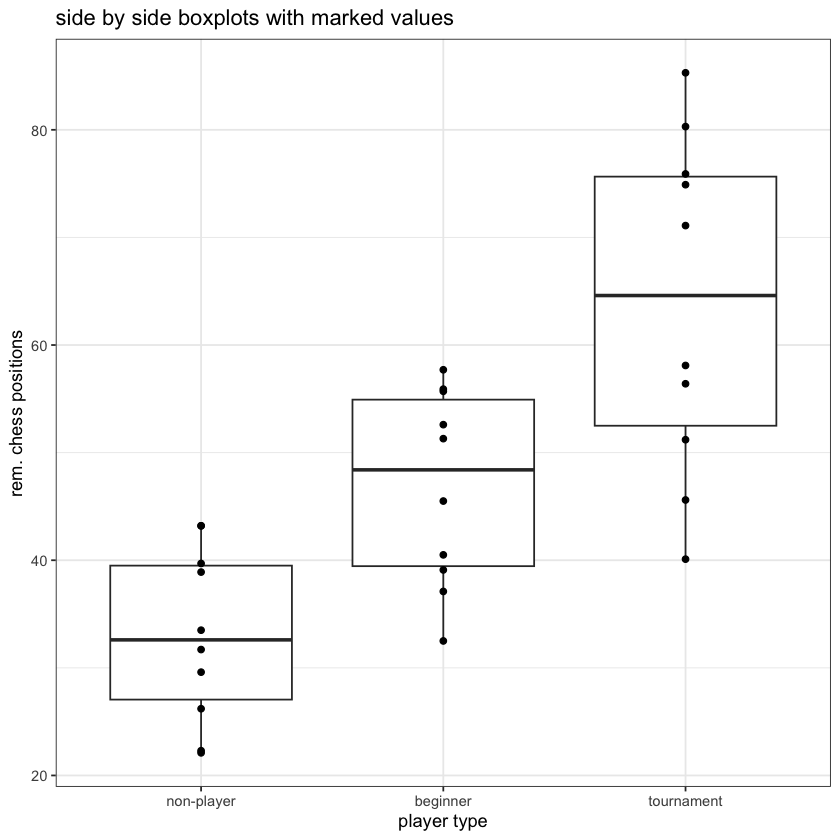

In [243]:
ggplot(data = data1) + 
  geom_boxplot(mapping = aes(x=type, y=res, group = type)) +
  geom_point(mapping = aes(x=type,y=res,group=type)) +
  xlab("player type") +
  ylab("rem. chess positions") +
  ggtitle("side by side boxplots with marked values") +
  theme_bw()

In [244]:
#####################################################
# Descriptive Statistics: changing measures
# Solution
#
# File: des_stat_different_measures_sol.R
#
#####################################################
# Make up data sets with 5 numbers each that have:
# a) the same mean but different standard deviations.
xa <- c(1,3,5,7,9)
ya <- c(3,4,5,6,7)
mean(xa); mean(ya)
# 5        2

[1] 5

[1] 5

In [245]:
sd(xa); sd(ya)
# sd(xa)    sd(ya)
# 3.162278  1.581139

[1] 3.162278

[1] 1.581139

In [246]:
# b) the same mean but different medians.
xb <- c(1,3,5,7,9)
yb <- c(1,3,6,7,8)

mean(xb); mean(yb);
# 5           5      
median(xb); median(yb)
# 5           6


[1] 5

[1] 5

[1] 5

[1] 6

In [247]:
# c) the same median but different means.
xc <- c(1,3,5,7,9)
yc <- c(1,3,5,7,14)
mean(xc); mean(yc); median(xc); median(yc)
#  5        6           5          5

[1] 5

[1] 6

[1] 5

[1] 5

In [248]:
#####################################################
# Descriptive Statistics: Arithmetic mean, the geometric 
# mean, the harmonic mean and the trimmed 20% mean from 
# a frequency table
# Solution
#
# File: des_stat_freq_tab_measures_sol.R
#
#####################################################

library(tidyverse)

# Consider the freuency table
f.tab <- tibble(
  obs = 1:8,
  n = c(5,4,1,7,2,3,1,2)
)
f.tab

obs,n
<int>,<dbl>
1,5
2,4
3,1
4,7
5,2
6,3
7,1
8,2


In [249]:
# convert to an ordered sample
x.ordered <- rep(f.tab$obs,f.tab$n)

# a) mean
mean(x.ordered)

[1] 3.8

In [250]:

# b) geometric mean
(f.tab$obs**f.tab$n %>% prod())**(1/sum(f.tab$n))

[1] 3.098656

In [251]:
# c) harmonic mean
sum(f.tab$n)/sum(f.tab$n/f.tab$obs)

[1] 2.409362

In [252]:
# d) trimmed 20% mean
# mean(x, trim = 0, na.rm = FALSE, ...)
# x	R object
# trim the fraction (0 to 0.5) of observations to be trimmed from each end of x 
# before the mean is computed. Values of trim outside that range are taken as 
# the nearest endpoint.
mean(x.ordered,trim = 0.1)

[1] 3.666667

In [253]:
#####################################################
# Descriptive Statistics: Exercise 3.1, 
# Heumann, Schomaker, page 63
# Solution
#
# File: des_stat_hiking_sol.R
#
###################################################### 
library(tidyverse)

# generate the data
distance <- c(12.5,29.9,14.8,18.7,7.6,16.2,16.5,27.4,12.1,17.5)
altitude <- c(342,1245,502,555,398,670,796,912,238,466)
# sorted data
sort(distance)
sort(altitude)

[1]  7.6 12.1 12.5 14.8 16.2 16.5 17.5 18.7 27.4 29.9

[1]  238  342  398  466  502  555  670  796  912 1245

In [254]:
# mean and median
mean(distance)
mean(altitude)

[1] 17.32

[1] 612.4

In [255]:
# R offers several ways of calculating quantiles. Use type=1
# to apply the method we have introduced.
quantile(distance,probs = c(0.25,0.5,0.75),type=1)
quantile(altitude,probs = c(0.25,0.5,0.75),type=1)

25%  50%  75% 
12.5 16.2 18.7

25% 50% 75% 
398 502 796

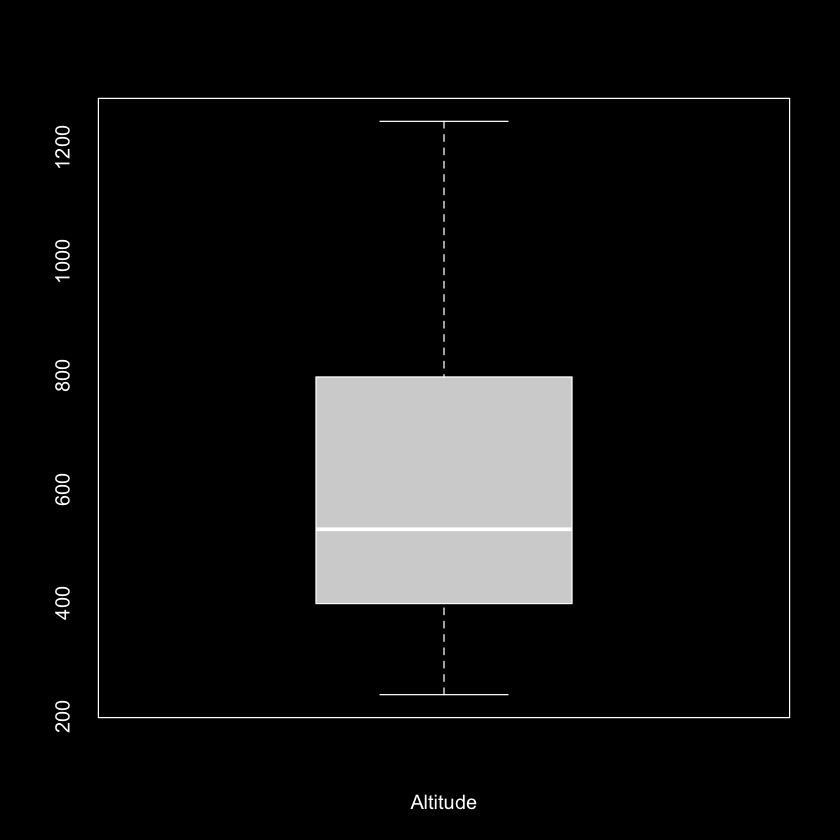

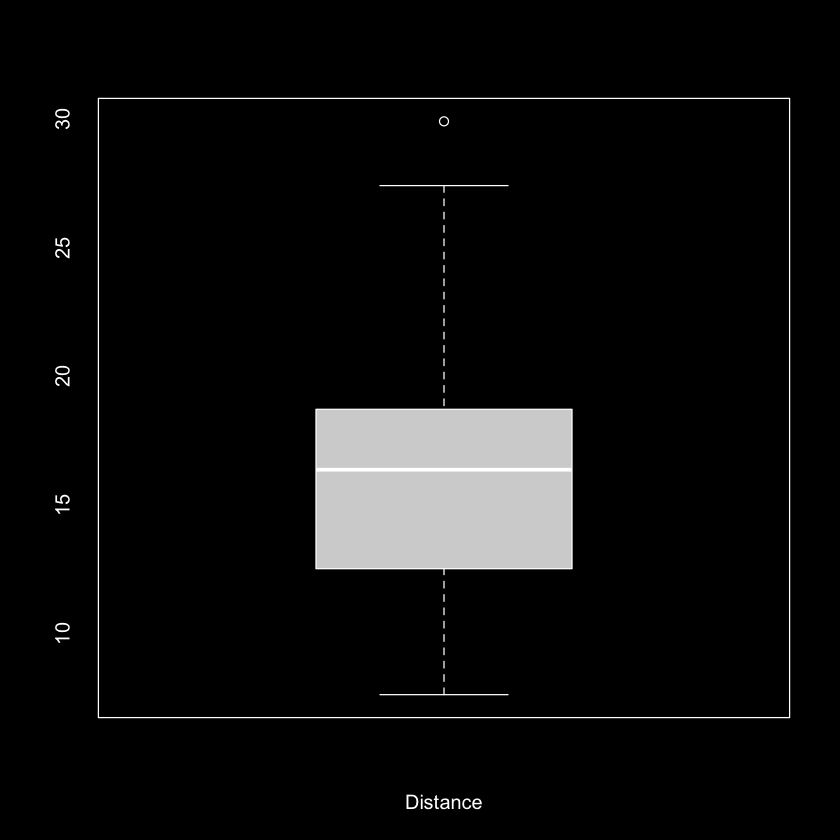

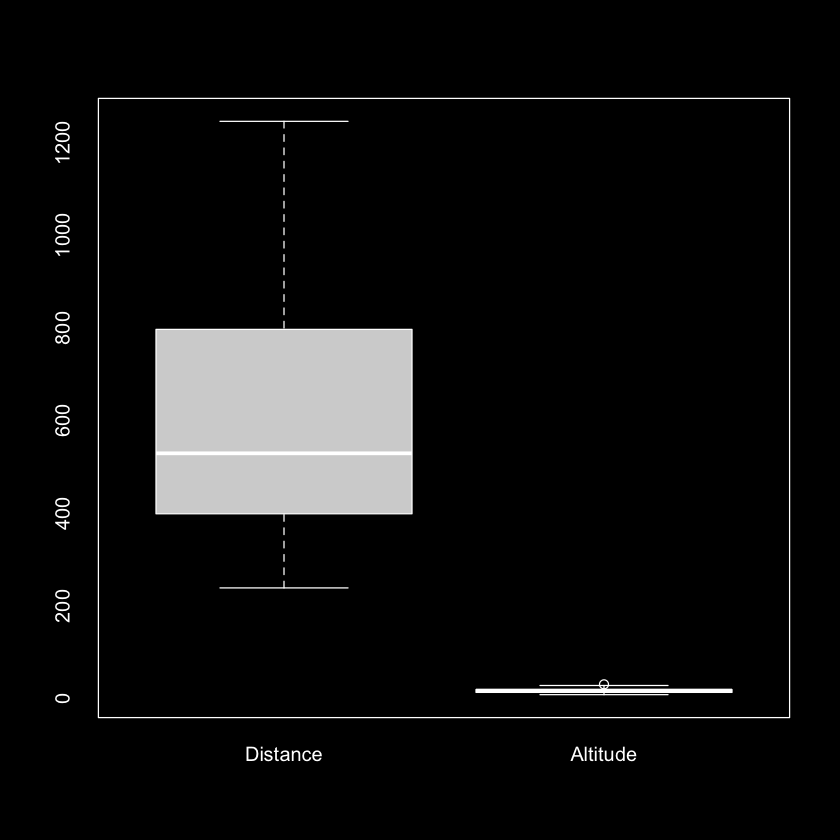

In [256]:
# Set the graphical parameters for the boxplots
par(bg = "black", col = "white", col.axis = "white", col.lab = "white")

# Create boxplots for altitude and distance with white bars
boxplot(altitude, main = "Altitude", xlab = "Altitude", border = "white")
boxplot(distance, main = "Distance", xlab = "Distance", border = "white")

# Create a combined boxplot for altitude and distance with white bars
boxplot(altitude, distance, 
        main = "Altitude and Distance",
        names = c("Distance", "Altitude"),
        border = "white")


In [257]:
# variance and standard deviation
var(distance)
var(altitude)
sd(distance)
sd(altitude)

[1] 46.11511

[1] 91460.49

[1] 6.790811

[1] 302.4244

# The Difference Between Standard Deviation and Variance

Standard deviation and variance are both measures of the spread or dispersion of a dataset, but they are calculated differently and provide slightly different insights into the data.

## Difference

The main difference between standard deviation and variance lies in their units of measurement. Standard deviation is the square root of the variance. While variance is measured in the square of the original units of the data, standard deviation is measured in the same units as the data itself.

## Interpretation

Variance gives a measure of how much the data values deviate from the mean, squared. A higher variance indicates that the data points are more spread out from the mean, while a lower variance indicates that the data points are closer to the mean.

## Formulas

### Variance
The variance, denoted as σ², is calculated as the average of the squared differences from the mean:
$$ \sigma^2 = \frac{\sum (x_i - \mu)^2}{n} $$

Where:
- σ² is the variance
- \( x_i \) are the individual data points
- μ is the mean of the data
- n is the total number of data points

### Standard Deviation
The standard deviation, denoted as σ, is the square root of the variance:
$$ \sigma = \sqrt{\sigma^2} $$

Where:
- σ is the standard deviation
- σ² is the variance

## Applications of This Information

Understanding the concepts of standard deviation and variance is crucial in various fields such as statistics, finance, engineering, and science. These measures help in analyzing data distribution, identifying patterns, and making informed decisions based on data variability.


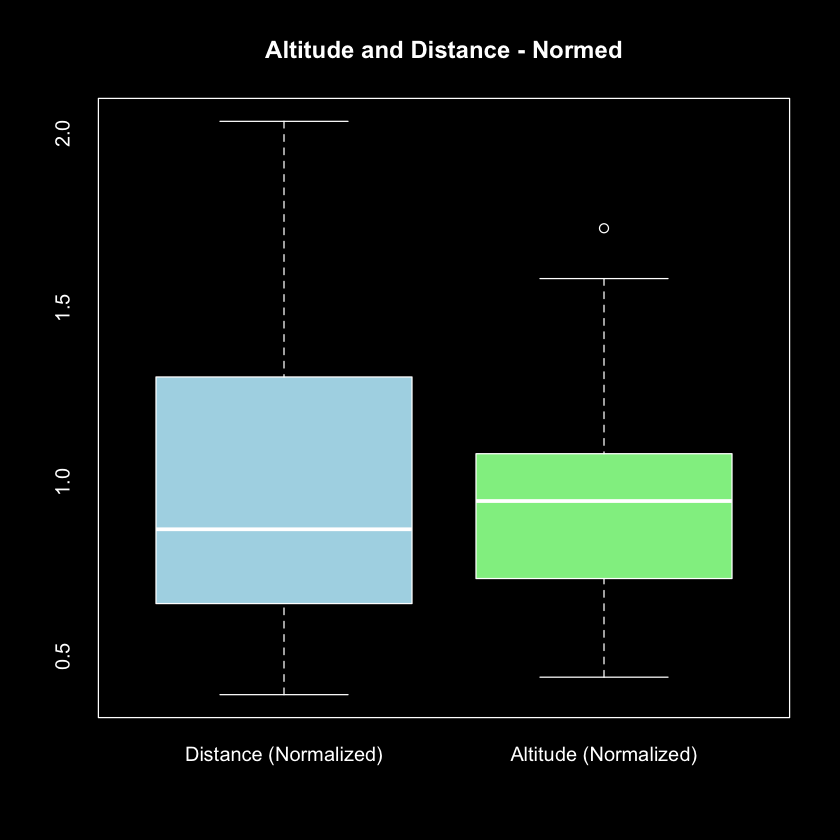

In [258]:
 # Make the values comparable
distance.norm <- distance/mean(distance)
altitude.norm <- altitude/mean(altitude)

# Set the graphical parameters for the boxplots
par(bg = "black", col = "white", col.axis = "white", col.lab = "white")

# Create boxplots for normalized altitude and distance
boxplot(altitude.norm, distance.norm, 
        main = "Altitude and Distance - Normed",
        names = c("Distance (Normalized)", "Altitude (Normalized)"),
        col = c("lightblue", "lightgreen"), 
        border = "white",
        col.main = "white",   # Title color
        col.lab = "white",    # Axis label color
        col.axis = "white",   # Axis tick and text color
        col.names = "white"  # Group names color
        )


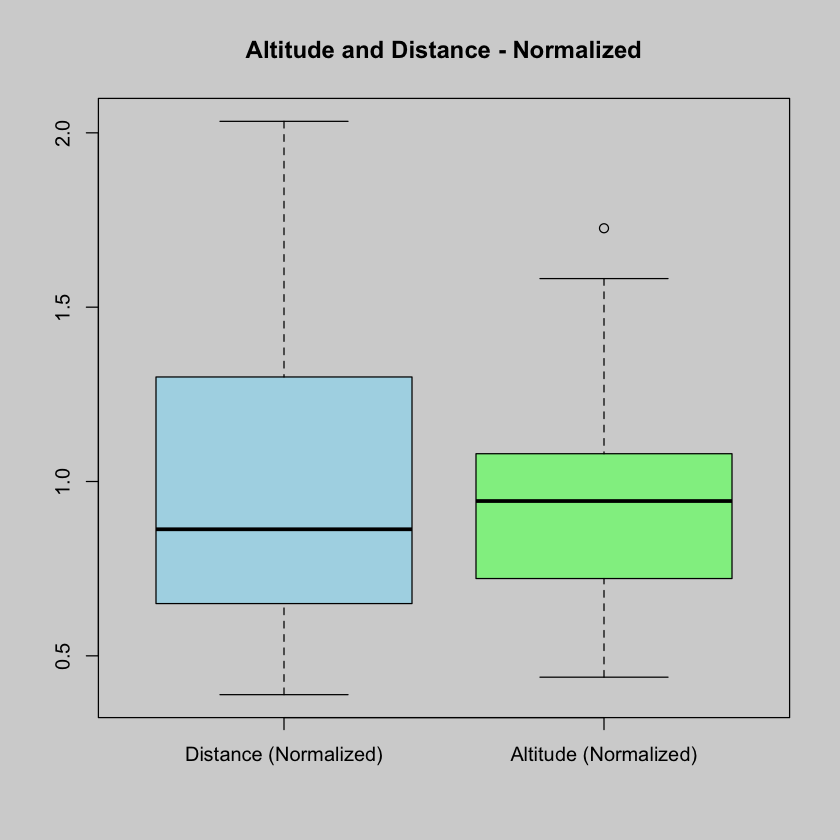

In [259]:
# Set the background color of the plotting device
par(bg = "lightgray", col = "black", col.axis = "black", col.lab = "black")

# Create boxplots for normalized altitude and distance
boxplot(altitude.norm, distance.norm, 
        main = "Altitude and Distance - Normalized",
        names = c("Distance (Normalized)", "Altitude (Normalized)"),
        col = c("lightblue", "lightgreen"), 
        border = "black")


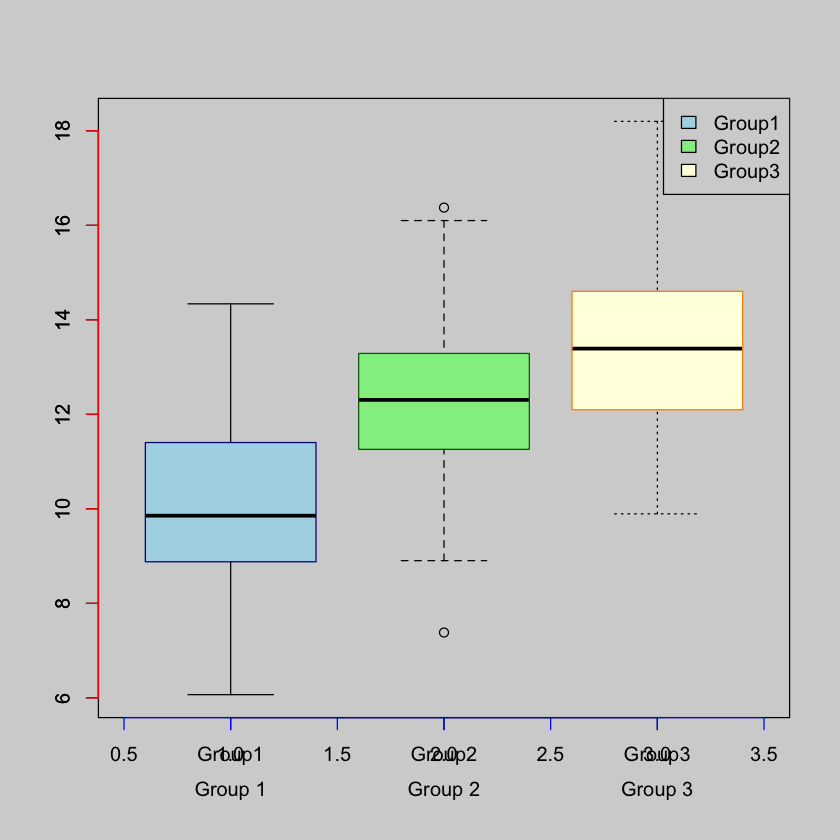

In [260]:
# Generate example data
set.seed(123)
data <- list(
  Group1 = rnorm(50, mean = 10, sd = 2),
  Group2 = rnorm(50, mean = 12, sd = 2),
  Group3 = rnorm(50, mean = 14, sd = 2)
)

# Set the background color of the plotting device
par(bg = "lightgray")

# Plot boxplot with different box colors and line colors
boxplot(data, col = c("lightblue", "lightgreen", "lightyellow"), border = "black", 
        boxcol = c("darkblue", "darkgreen", "darkorange"), whisklty = c(1, 2, 3), 
        staplelty = c(1, 2, 3), at = 1:3)

# Customize x and y axis colors
axis(1, col = "blue")
axis(2, col = "red")

# Calculate the minimum y-coordinate of the x-axis
y_min <- par("usr")[3]

# Add text labels just below x-axis
text(1:3, y_min - 1.5, labels = paste("Group", 1:3), xpd = TRUE, adj = c(0.5, 0.5))

# Add a legend
legend("topright", legend = names(data), fill = c("lightblue", "lightgreen", "lightyellow"), border = "black")


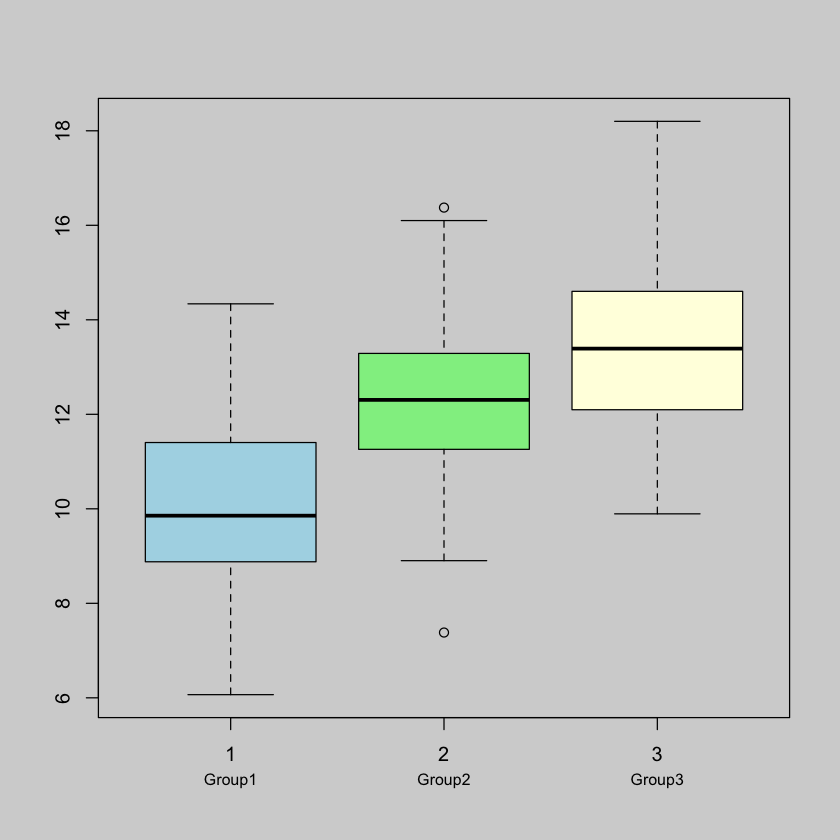

In [261]:
# Generate example data
set.seed(123)
data <- list(
  rnorm(50, mean = 10, sd = 2),
  rnorm(50, mean = 12, sd = 2),
  rnorm(50, mean = 14, sd = 2)
)

# Set the background color of the plotting device
par(bg = "lightgray")

# Plot boxplot with different background colors
boxplot(data, col = c("lightblue", "lightgreen", "lightyellow"), border = "black")

# Add a legend
#legend("topright", legend = names(data), fill = c("lightblue", "lightgreen", "lightyellow"), border = "black")

# Add text labels just below x-axis
mtext(c("Group1", "Group2", "Group3"), side = 1, line = 2, at = c(1, 2, 3), col = "black", cex = 0.8)


In [262]:

# coefficients of variation
sd(distance)/mean(distance) # = sd(distance.norm)
sd(altitude)/mean(altitude) # = sd(altitude.norm)


[1] 0.3920791

[1] 0.4938347

In [263]:

# coefficients of variation
sd(distance.norm)
sd(altitude.norm)

[1] 0.3920791

[1] 0.4938347

In [264]:

distance <- c(12.5,29.9,14.8,18.7,7.6,16.2,16.5,27.4,12.1,17.5)
distance.norm <- distance/mean(distance)
distance.norm

[1] 0.7217090 1.7263279 0.8545035 1.0796767 0.4387991 0.9353349 0.9526559
 [8] 1.5819861 0.6986143 1.0103926

# Calculation of Mean

The mean, often denoted as \( \mu \), is a measure of central tendency that represents the average value of a dataset. It is calculated using the formula:

\[
\mu = \frac{1}{n} \sum_{i=1}^{n} x_i
\]

Where:
- \( \mu \) is the mean
- \( n \) is the total number of values in the dataset
- \( x_i \) are the individual values in the dataset

This formula sums up all the values in the dataset and divides by the total number of values to obtain the average value.

The mean is a fundamental statistical measure and is widely used in various fields for data analysis and interpretation.


In [265]:
# Define HTML code
html_code <- '
<html>
<head>
<title>My HTML Page</title>
</head>
<body>
<h1>This is a Heading</h1>
<p>This is a paragraph.</p>
</body>
</html>
'

# Display HTML content
display_html(html_code)


My HTML Page 
 
 
 This is a Heading 
 This is a paragraph.

In [266]:
#####################################################
# Descriptive Statistics: Different measure of sample
# Solution
#
# File: des_stat_measures_sample_sol.R
#
#####################################################

# Consider the observations 
x <- c(4,3,2,4,10)

# a) mean
mean(x)

[1] 4.6

In [267]:
display_html("
<!DOCTYPE html>
<html lang='en'>
<head>
<meta charset='UTF-8'>
<meta name='viewport' content='width=device-width, initial-scale=1.0'>
<title>Mean Formula</title>
</head>
<body>

<h2>Mean (Average) Formula:</h2>
<p>The mean (average) of a set of numbers is calculated by summing all the numbers in the set and then dividing by the count of numbers in the set.</p>
<p>Mathematically, the formula for mean is:</p>
<p style='font-family: \"Times New Roman\", Times, serif; font-size: 18px;'>
    <span>&#x03BC; =</span>
    <span style='margin-left: 5px;'>&sum;<sub>i=1</sub><sup>n</sup> x<sub>i</sub></span>
    <span style='margin-left: 5px;'>/</span>
    <span style='margin-left: 5px;'>n</span>
</p>

<h2>Application:</h2>
<p>The mean is commonly used to find the average of a set of numerical data. It is useful in various fields such as statistics, mathematics, and science.</p>

<h2>Example:</h2>
<p>Consider a set of numbers: {1.2 x 10<sup>4</sup>, 2.5 x 10<sup>3</sup>, 3.8 x 10<sup>4</sup>, 4.6 x 10<sup>3</sup>, 5.7 x 10<sup>3</sup>}</p>
<p>To find the mean, we add all the numbers together and divide by the count of numbers:</p>
<p style='font-family: \"Times New Roman\", Times, serif; font-size: 18px;'>
    <span>&#x03BC; =</span>
    <span>(1.2 x 10<sup>4</sup> + 2.5 x 10<sup>3</sup> + 3.8 x 10<sup>4</sup> + 4.6 x 10<sup>3</sup> + 5.7 x 10<sup>3</sup>)</span>
    <span>/</span>
    <span>n</span>
</p>
<p>After performing the calculations, the mean is approximately <strong>1.78 x 10<sup>4</sup></strong>.</p>

</body>
</html>
")


<!DOCTYPE html>
 
 
 
 
 Mean Formula 
 
 

 Mean (Average) Formula: 
 The mean (average) of a set of numbers is calculated by summing all the numbers in the set and then dividing by the count of numbers in the set. 
 Mathematically, the formula for mean is: 
 
 μ = 
 ∑ i=1 n x i 
 / 
 n 
 

 Application: 
 The mean is commonly used to find the average of a set of numerical data. It is useful in various fields such as statistics, mathematics, and science. 

 Example: 
 Consider a set of numbers: {1.2 x 10 4 , 2.5 x 10 3 , 3.8 x 10 4 , 4.6 x 10 3 , 5.7 x 10 3 } 
 To find the mean, we add all the numbers together and divide by the count of numbers: 
 
 μ = 
 (1.2 x 10 4 + 2.5 x 10 3 + 3.8 x 10 4 + 4.6 x 10 3 + 5.7 x 10 3 ) 
 / 
 n 
 
 After performing the calculations, the mean is approximately 1.78 x 10 4 .

In [268]:
# b) median
x.ordered <- sort(x)  # ordered sample
x.ordered[ceiling((length(x))/2)]

[1] 4

In [269]:
# Install and load the IRdisplay package
install.packages("IRdisplay")
library(IRdisplay)

# nolinter
# Define the HTML code
html_code_median <- "
<!DOCTYPE html>
<html lang='en'>
<head>
<meta charset='UTF-8'>
<meta name='viewport' content='width=device-width, initial-scale=1.0'>
<title>R Code Explanation</title>
</head>
<body>

<h2>R Code Explanation:</h2>

<ol>
    <li><code>x &lt;- c(4, 3, 2, 4, 10)</code>: This line creates a numeric vector <code>x</code> containing the observations <code>[4, 3, 2, 4, 10]</code>.</li>

    <li><code>x.ordered &lt;- sort(x)</code>: This line sorts the observations in ascending order and assigns the sorted vector to <code>x.ordered</code>. Sorting the data is a necessary step for calculating the median.</li>

    <li><code>x.ordered[ceiling((length(x))/2)]</code>: This calculates the median of the sorted observations. The length of the vector <code>x</code> is divided by 2 to find the position of the middle element. If the length of <code>x</code> is odd, <code>ceiling()</code> ensures that the position is rounded up to the nearest integer. Then, the value at this position in the sorted vector <code>x.ordered</code> is returned as the median.</li>
</ol>

</body>
</html>
"

# Display HTML content
display_html(html_code_median)



Die heruntergeladenen Bin"arpakete sind in 
	/var/folders/t0/f054bgvj7d514yq2qlg1czv80000gp/T//RtmpEjhJYK/downloaded_packages


<!DOCTYPE html>
 
 
 
 
 R Code Explanation 
 
 

 R Code Explanation: 

 
 x <- c(4, 3, 2, 4, 10) : This line creates a numeric vector x containing the observations [4, 3, 2, 4, 10] . 

 x.ordered <- sort(x) : This line sorts the observations in ascending order and assigns the sorted vector to x.ordered . Sorting the data is a necessary step for calculating the median. 

 x.ordered[ceiling((length(x))/2)] : This calculates the median of the sorted observations. The length of the vector x is divided by 2 to find the position of the middle element. If the length of x is odd, ceiling() ensures that the position is rounded up to the nearest integer. Then, the value at this position in the sorted vector x.ordered is returned as the median.

In [270]:
# mention that median() function does not always get the same result; for 
# example median(c(x,1)) is 3.5 but according to our definition it is 3
# quantile() with type=1 is equivalent to our definition
quantile(x, p=0.5, type=1)

50% 
  4

In [271]:
# Install and load the IRdisplay package
install.packages("IRdisplay")
library(IRdisplay)

# Display HTML content
display_html('
<!DOCTYPE html>
<html lang="en">
<head>
<meta charset="UTF-8">
<meta name="viewport" content="width=device-width, initial-scale=1.0">
<title>Quantile Computation in R</title>
</head>
<body style="line-height: 1.5;">

<h2>Quantile Computation in R:</h2>

<p>In R, the type parameter in the quantile() function determines the method used to calculate quantiles. The type argument can take different values, each corresponding to a different algorithm for computing quantiles.</p>

<p>For <strong>type = 1</strong>, the quantile() function computes sample quantiles using the formula <em>(n-1)&times;p + 1</em>, where <em>p</em> is the desired quantile (expressed as a probability), and <em>n</em> is the number of observations. This method is sometimes referred to as the "method of moments" or "R-7" method.</p>

<p>Here\'s a brief explanation of the different types:</p>

<ul>
    <li><strong>Type 1 (default):</strong> This is the default method used by R. It calculates quantiles using the <em>(n-1)&times;p + 1</em> formula. This method is also known as the "method of moments" or "R-7" method.</li>
    <li><strong>Type 2:</strong> This method is used in many statistical software packages. It interpolates between the two nearest order statistics. Provides a continuous distribution function. Also known as the "continuous sample quantile" method.</li>
    <li><strong>Type 3:</strong> Similar to Type 2 but uses a different formula for interpolation. Provides a continuous distribution function.</li>
    <li><strong>Type 4:</strong> Used by SAS and SPSS. Similar to Type 3 but uses a different formula for interpolation. Provides a continuous distribution function.</li>
    <li><strong>Type 5:</strong> Used by SAS and SPSS. Differs from Type 4 in how it handles rounding errors. Provides a continuous distribution function.</li>
</ul>

<p>For example, when you specify <strong>type = 1</strong> in the quantile() function, it calculates the quantiles using the "method of moments" formula, which might yield different results compared to other types of quantile calculations.</p>

<p>Regarding your example, quantile(x, p = 0.5, type = 1) calculates the median of the vector x using the <strong>type = 1</strong> method, which is equivalent to the definition of the median you provided earlier.</p>

<p>In R, the quantile() function supports several types for computing quantiles. Here\'s an overview of the available types:</p>

<ol>
    <li><strong>Type 1 (default):</strong> This is the default method used by R. It calculates quantiles using the formula <em>(n-1)&times;p + 1</em>. Also known as the "method of moments" or "R-7" method.</li>
    <li><strong>Type 2:</strong> This method is used in many statistical software packages. It interpolates between the two nearest order statistics. Provides a continuous distribution function. Also known as the "continuous sample quantile" method.</li>
    <li><strong>Type 3:</strong> Similar to Type 2 but uses a different formula for interpolation. Provides a continuous distribution function.</li>
    <li><strong>Type 4:</strong> Used by SAS and SPSS. Similar to Type 3 but uses a different formula for interpolation. Provides a continuous distribution function.</li>
    <li><strong>Type 5:</strong> Used by SAS and SPSS. Differs from Type 4 in how it handles rounding errors. Provides a continuous distribution function.</li>
</ol>

<p>The choice of type can affect the computed quantiles, especially for small sample sizes or datasets with tied observations. Different types may result in slightly different quantile estimates, so it\'s essential to understand the characteristics of each type and choose the appropriate one based on the specific requirements of your analysis.</p>

<h3>Examples of Quantile Calculation:</h3>

<p>Example 1: Using Type 1 (default)</p>
<pre><code>quantile(x, p = 0.5, type = 1)</code></pre>

<p>Example 2: Using Type 2</p>
<pre><code>quantile(x, p = 0.5, type = 2)</code></pre>

<p>Example 3: Using Type 3</p>
<pre><code>quantile(x, p = 0.5, type = 3)</code></pre>

<p>Example 4: Using Type 4</p>
<pre><code>quantile(x, p = 0.5, type = 4)</code></pre>

<p>Example 5: Using Type 5</p>
<pre><code>quantile(x, p = 0.5, type = 5)</code></pre>

</body>
</html>
')



Die heruntergeladenen Bin"arpakete sind in 
	/var/folders/t0/f054bgvj7d514yq2qlg1czv80000gp/T//RtmpEjhJYK/downloaded_packages


<!DOCTYPE html>
 
 
 
 
 Quantile Computation in R 
 
 

 Quantile Computation in R: 

 In R, the type parameter in the quantile() function determines the method used to calculate quantiles. The type argument can take different values, each corresponding to a different algorithm for computing quantiles. 

 For type = 1 , the quantile() function computes sample quantiles using the formula (n-1)×p + 1 , where p is the desired quantile (expressed as a probability), and n is the number of observations. This method is sometimes referred to as the "method of moments" or "R-7" method. 

 Here's a brief explanation of the different types: 

 
 Type 1 (default): This is the default method used by R. It calculates quantiles using the (n-1)×p + 1 formula. This method is also known as the "method of moments" or "R-7" method. 
 Type 2: This method is used in many statistical software packages. It interpolates between the two nearest order statistics. Provides a continuous distribution function. Also known as the "continuous sample quantile" method. 
 Type 3: Similar to Type 2 but uses a different formula for interpolation. Provides a continuous distribution function. 
 Type 4: Used by SAS and SPSS. Similar to Type 3 but uses a different formula for interpolation. Provides a continuous distribution function. 
 Type 5: Used by SAS and SPSS. Differs from Type 4 in how it handles rounding errors. Provides a continuous distribution function. 
 

 For example, when you specify type = 1 in the quantile() function, it calculates the quantiles using the "method of moments" formula, which might yield different results compared to other types of quantile calculations. 

 Regarding your example, quantile(x, p = 0.5, type = 1) calculates the median of the vector x using the type = 1 method, which is equivalent to the definition of the median you provided earlier. 

 In R, the quantile() function supports several types for computing quantiles. Here's an overview of the available types: 

 
 Type 1 (default): This is the default method used by R. It calculates quantiles using the formula (n-1)×p + 1 . Also known as the "method of moments" or "R-7" method. 
 Type 2: This method is used in many statistical software packages. It interpolates between the two nearest order statistics. Provides a continuous distribution function. Also known as the "continuous sample quantile" method. 
 Type 3: Similar to Type 2 but uses a different formula for interpolation. Provides a continuous distribution function. 
 Type 4: Used by SAS and SPSS. Similar to Type 3 but uses a different formula for interpolation. Provides a continuous distribution function. 
 Type 5: Used by SAS and SPSS. Differs from Type 4 in how it handles rounding errors. Provides a continuous distribution function. 
 

 The choice of type can affect the computed quantiles, especially for small sample sizes or datasets with tied observations. Different types may result in slightly different quantile estimates, so it's essential to understand the characteristics of each type and choose the appropriate one based on the specific requirements of your analysis. 

 Examples of Quantile Calculation: 

 Example 1: Using Type 1 (default) 
 quantile(x, p = 0.5, type = 1) 

 Example 2: Using Type 2 
 quantile(x, p = 0.5, type = 2) 

 Example 3: Using Type 3 
 quantile(x, p = 0.5, type = 3) 

 Example 4: Using Type 4 
 quantile(x, p = 0.5, type = 4) 

 Example 5: Using Type 5 
 quantile(x, p = 0.5, type = 5)

In [272]:
# Consider the observations 
x <- c(4,3,2,4,10)
# c) mode
x %>% tibble(val = x) %>%
  # find the absolute frequencies of the values
  group_by(val) %>%
  mutate(n = n()) %>%
  ungroup() %>%
  # find the entries with max. abs. frequency
  filter(n == max(n)) %>%
  # select only value
  select(val) %>%
  # remove duplicate entries
  unique()

val
<dbl>
4


In [273]:
# Consider the observations
x <- c(4,3,2,4,10) #this is a vector object or what kind of object is this c(...)?

# Create a tibble with value and frequencies
tbl <- tibble(val = x, n = table(x)[as.character(x)]) #so the way you create a tibble is by saying tibble(column1, column2, column3, ...)?
tbl

# Find the maximum frequency
max_freq <- max(tbl$n) #why the $?

# Filter the entries with the maximum frequency
result <- tbl[tbl$n == max_freq, ] #why does it need this ','?

# Select only the value column
result <- result[, "val", drop = FALSE] #why does this need a comma? #what does drop do?
#could I apply the unique(result) on result before this row?

# Remove duplicate entries
result <- unique(result)

#result

val,n
<dbl>,<table[1d]>
4,2
3,1
2,1
4,2
10,1


In [274]:
display_html('
<ol>
  <li>
    <strong>Explanation:</strong>
    <br>
    <ul>
      <li><code><span style="color: blue; font-weight: bold;">x <- c(4,3,2,4,10)</span></code>: This line creates a vector object <code>x</code> containing the numbers 4, 3, 2, 4, and 10. The <code>c()</code> function is used to concatenate values into a vector.</li>
      <li><code><span style="color: blue; font-weight: bold;">tbl <- tibble(val = x, n = table(x)[as.character(x)])</span></code>: This line creates a tibble. The <code>tibble()</code> function is used to create a tibble, and you specify the columns and their values inside the function call.</li>
      <li><code><span style="color: blue; font-weight: bold;">max_freq <- max(tbl$n)</span></code>: The <code>$</code> is used to access a specific column in a dataframe or tibble. Here, <code>tbl$n</code> refers to the column named <code>n</code> in the tibble <code>tbl</code>.</li>
      <li><code><span style="color: blue; font-weight: bold;">result <- tbl[tbl$n == max_freq, ]</span></code>: The comma here is used to specify that you want all rows of <code>tbl</code> where the condition <code>tbl$n == max_freq</code> is true. The condition is used to filter rows where the frequency (<code>n</code>) equals the maximum frequency (<code>max_freq</code>).</li>
      <li><code><span style="color: blue; font-weight: bold;">result <- result[, \'val\', drop = FALSE]</span></code>: The comma here is used to subset the columns of the <code>result</code> tibble. \'<code>val</code>\' specifies that you want to keep only the column named \'val\'. The <code>drop = FALSE</code> argument is used to prevent R from simplifying the result to a vector if the result has only one column. Yes, you can apply <code>unique()</code> to <code>result</code> before this line if you want to remove duplicate entries earlier.</li>
      <li><code><span style="color: blue; font-weight: bold;">result <- unique(result)</span></code>: This line removes duplicate entries from the <code>result</code> tibble based on all columns. It ensures that each row in the resulting tibble is unique.</li>
    </ul>
  </li>
  <li>
    <strong>Code Explanation:</strong>
    <br>
    <ol>
      <li><code><span style="color: green; font-weight: bold;">x %>% tibble(val = x)</span></code>: Creates a tibble with one column named \'val\' containing the values from the vector \'x\'.</li>
      <li><code><span style="color: green; font-weight: bold;">group_by(val)</span></code>: Groups the tibble by the \'val\' column.</li>
      <li><code><span style="color: green; font-weight: bold;">mutate(n = n())</span></code>: Adds a new column \'n\' to the tibble, which represents the count of each unique value in the \'val\' column.</li>
      <li><code><span style="color: green; font-weight: bold;">ungroup()</span></code>: Removes the grouping from the tibble.</li>
      <li><code><span style="color: green; font-weight: bold;">filter(n == max(n))</span></code>: Filters the tibble to keep only the rows where the count \'n\' is equal to the maximum count in the dataset, effectively finding the mode(s).</li>
      <li><code><span style="color: green; font-weight: bold;">select(val)</span></code>: Selects only the \'val\' column, which contains the mode(s).</li>
      <li><code><span style="color: green; font-weight: bold;">unique()</span></code>: Removes duplicate entries from the selected column, ensuring unique mode(s) are returned.</li>
    </ol>
  </li>
</ol>
')


Explanation: 
 
 
 x <- c(4,3,2,4,10) : This line creates a vector object x containing the numbers 4, 3, 2, 4, and 10. The c() function is used to concatenate values into a vector. 
 tbl <- tibble(val = x, n = table(x)[as.character(x)]) : This line creates a tibble. The tibble() function is used to create a tibble, and you specify the columns and their values inside the function call. 
 max_freq <- max(tbl$n) : The $ is used to access a specific column in a dataframe or tibble. Here, tbl$n refers to the column named n in the tibble tbl . 
 result <- tbl[tbl$n == max_freq, ] : The comma here is used to specify that you want all rows of tbl where the condition tbl$n == max_freq is true. The condition is used to filter rows where the frequency ( n ) equals the maximum frequency ( max_freq ). 
 result <- result[, 'val', drop = FALSE] : The comma here is used to subset the columns of the result tibble. ' val ' specifies that you want to keep only the column named 'val'. The drop = FALSE argument is used to prevent R from simplifying the result to a vector if the result has only one column. Yes, you can apply unique() to result before this line if you want to remove duplicate entries earlier. 
 result <- unique(result) : This line removes duplicate entries from the result tibble based on all columns. It ensures that each row in the resulting tibble is unique. 
 
 
 
 Code Explanation: 
 
 
 x %>% tibble(val = x) : Creates a tibble with one column named 'val' containing the values from the vector 'x'. 
 group_by(val) : Groups the tibble by the 'val' column. 
 mutate(n = n()) : Adds a new column 'n' to the tibble, which represents the count of each unique value in the 'val' column. 
 ungroup() : Removes the grouping from the tibble. 
 filter(n == max(n)) : Filters the tibble to keep only the rows where the count 'n' is equal to the maximum count in the dataset, effectively finding the mode(s). 
 select(val) : Selects only the 'val' column, which contains the mode(s). 
 unique() : Removes duplicate entries from the selected column, ensuring unique mode(s) are returned.

In [275]:
x <- c(4,3,2,4,10)

x.ordered <- sort(x)
x.ordered[ceiling(0.2 * length(x.ordered))]

[1] 2

In [276]:
# alternative
quantile(x, p=0.2, type=1)

20% 
  2

In [277]:
# trimmed 40% mean
# mean(x, trim = 0, na.rm = FALSE, ...)
# x	R object
# trim the fraction (0 to 0.5) of observations to be trimmed from each end of x 
# before the mean is computed. Values of trim outside that range are taken as 
# the nearest endpoint.
mean(x,trim = 0.2)

[1] 3.666667

In [278]:
x <- c(4,3,2,4,10)
x.ordered <- sort(x)
# alternative
x.ordered[floor(0.2*length(x)+1):ceiling(0.8*length(x))] %>%
  mean()

[1] 3.666667

In [279]:
x <- c(4, 3, 2, 4, 10)
subset_range <- floor(0.2 * length(x) + 1):ceiling(0.8 * length(x))
mean(x.ordered[subset_range])


[1] 3.666667

In [280]:
x <- c(4, 3, 2, 4, 10)
quantiles <- quantile(x, probs = c(0.2, 0.8), type = 1)
mean(x[x >= quantiles[1] & x <= quantiles[2]])

[1] 3.25

In [281]:
display_html("
<ol>
  <li>
    <strong>Code Explanation:</strong>
    <br>
    <p>
      <code>x <- c(4, 3, 2, 4, 10)</code>: This line creates a vector object <code>x</code> containing the numbers 4, 3, 2, 4, and 10.
    </p>
    <p>
      <code>subset_range <- floor(0.2 * length(x) + 1):ceiling(0.8 * length(x))</code>: Here, we calculate the indices of the elements within the 20th and 80th percentiles of <code>x</code>. The <code>floor()</code> function rounds down to get the starting index, and the <code>ceiling()</code> function rounds up to get the ending index.
    </p>
    <p>
      <code>mean(subset(x.ordered, subset = subset_range))</code>: This line calculates the mean of the subset of <code>x.ordered</code> defined by the <code>subset_range</code>. It extracts the elements within this range using the <code>subset()</code> function and then calculates their mean using the <code>mean()</code> function.
    </p>
  </li>
</ol>
")


Code Explanation: 
 
 
 x <- c(4, 3, 2, 4, 10) : This line creates a vector object x containing the numbers 4, 3, 2, 4, and 10.
 
 
 subset_range <- floor(0.2 * length(x) + 1):ceiling(0.8 * length(x)) : Here, we calculate the indices of the elements within the 20th and 80th percentiles of x . The floor() function rounds down to get the starting index, and the ceiling() function rounds up to get the ending index.
 
 
 mean(subset(x.ordered, subset = subset_range)) : This line calculates the mean of the subset of x.ordered defined by the subset_range . It extracts the elements within this range using the subset() function and then calculates their mean using the mean() function.

In [282]:
length(x)

[1] 5

In [283]:
floor(0.2 * length(x) + 1)

[1] 2

In [284]:
1.3 * length(x)

[1] 6.5

In [285]:
ceiling(1.3 * length(x))

[1] 7

In [286]:
quantile(x, probs = c(0.2, 0.8), type = 3)

20% 80% 
  2   4

In [287]:
# Define the vector x
x <- c(4, 3, 2, 4, 10)

# Create an empty list to store the results
results <- list()

# Define the values for iteration
t <- c(1, 2, 3, 4, 5)

# Iterate over values of x
for (i in t) {
    # Calculate quantiles for the current value of x
    quantile <- quantile(x, probs = c(0.2, 0.8), type = i)
    
    # Store the results in the list
    results[[as.character(i)]] <- quantile
}

# Print the results
print(results)


$`1`
20% 80% 
  2   4 

$`2`
20% 80% 
2.5 7.0 

$`3`
20% 80% 
  2   4 

$`4`
20% 80% 
  2   4 

$`5`
20% 80% 
2.5 7.0 



In [288]:
# Define the vector x
x <- c(4, 3, 2, 4, 10)

# Define the values for iteration
t <- c(1, 2, 3, 4, 5)

# Calculate the number of elements in t
num_t <- length(t)

# Initialize an empty 3-dimensional array to store the results
results <- array(NA, dim = c(2, num_t, 1))

# Iterate over values of x
for (i in seq_along(t)) {
    # Calculate quantiles for the current value of x
    quantiles <- quantile(x, probs = c(0.2, 0.8), type = t[i])
    
    # Store the results in the array
    results[, i, ] <- quantiles
}

# Print the results
print(results)

, , 1

     [,1] [,2] [,3] [,4] [,5]
[1,]    2  2.5    2    2  2.5
[2,]    4  7.0    4    4  7.0



In [289]:
?mpg

mpg                  package:ggplot2                   R Documentation

_F_u_e_l _e_c_o_n_o_m_y _d_a_t_a _f_r_o_m _1_9_9_9 _t_o _2_0_0_8 _f_o_r _3_8 _p_o_p_u_l_a_r _m_o_d_e_l_s _o_f _c_a_r_s

_D_e_s_c_r_i_p_t_i_o_n:

     This dataset contains a subset of the fuel economy data that the
     EPA makes available on <https://fueleconomy.gov/>. It contains
     only models which had a new release every year between 1999 and
     2008 - this was used as a proxy for the popularity of the car.

_U_s_a_g_e:

     mpg
     
_F_o_r_m_a_t:

     A data frame with 234 rows and 11 variables:

     manufacturer manufacturer name

     model model name

     displ engine displacement, in litres

     year year of manufacture

     cyl number of cylinders

     trans type of transmission

     drv the type of drive train, where f = front-wheel drive, r = rear
          wheel drive, 4 = 4wd

     cty city miles per gallon

     

In [290]:
# Alternative syntax using base R
tab <- within(mpg, {
  displ_class <- cut(displ, breaks = c(1, 3, 5, 8), labels = c("small", "medium", "big"))
})[, c("displ", "hwy", "displ_class")]

tab


displ,hwy,displ_class
<dbl>,<int>,<fct>
1.8,29,small
1.8,29,small
2.0,31,small
2.0,30,small
2.8,26,small
2.8,26,small
3.1,27,medium
1.8,26,small
1.8,25,small


In [291]:
# select only the variables displ and hwy and add 
# a colummn displ_class which denotes the belonging
# to one of the groups 
# low (1 < displ <= 3), medium (3 < displ <= 5),
# big (5 < displ <= 8)
# very interesting syntax and how it all works together
# mpg is a dataset, constantely accessible for examples

tab <-
  mpg %>%
  select(displ,hwy) %>%
  mutate(displ_class = 
           cut(displ,breaks = c(1,3,5,8),
               labels = c("small","medium","big"))
  )
tab

displ,hwy,displ_class
<dbl>,<int>,<fct>
1.8,29,small
1.8,29,small
2.0,31,small
2.0,30,small
2.8,26,small
2.8,26,small
3.1,27,medium
1.8,26,small
1.8,25,small


In [292]:
display_html("
<p>In R, the <code>cut()</code> function is used to divide a continuous variable into intervals or categories. It's commonly used for creating categorical variables from numeric data.</p>

<p>Here's how <code>cut()</code> works and what its arguments do:</p>

<ol>
  <li><strong>x:</strong> This is the numeric vector or factor that you want to cut into intervals.</li>
  <li><strong>breaks:</strong> This defines the breakpoints for creating intervals. Breaks can be specified as a numeric vector, indicating the cut points between intervals. For example, <code>c(1, 3, 5, 8)</code> specifies that the intervals should be created between 1 and 3, 3 and 5, and 5 and 8.</li>
  <li><strong>labels:</strong> This is an optional argument that allows you to assign labels to the intervals. These labels will be used to identify the intervals in the resulting output. For example, <code>c(&quot;small&quot;, &quot;medium&quot;, &quot;big&quot;)</code> assigns labels &quot;small&quot; to the first interval, &quot;medium&quot; to the second interval, and &quot;big&quot; to the third interval.</li>
  <li><strong>right:</strong> This logical value determines whether the intervals are closed on the right (inclusive) or the left (exclusive). By default, it is set to <code>TRUE</code>, meaning intervals are closed on the right.</li>
  <li><strong>include.lowest:</strong> This logical value indicates whether the lowest value of <code>x</code> should be included in the first interval. By default, it is set to <code>FALSE</code>.</li>
  <li><strong>...</strong>: This allows additional arguments to be passed to the function.</li>
</ol>

<p>Here's an example usage:</p>

<pre><code>&lt;!-- R code --&gt;
# Create a numeric vector
x &lt;- c(1, 2, 3, 4, 5, 6, 7, 8, 9)

# Cut the vector into intervals
cut_x &lt;- cut(x, breaks = c(1, 3, 5, 8), labels = c(&quot;small&quot;, &quot;medium&quot;, &quot;big&quot;))

# Print the result
print(cut_x)
</code></pre>

<p>This will output:</p>

<pre><code>small  small  small  medium medium medium big    big    big   
Levels: small medium big
</code></pre>

<p>In this example, <code>x</code> is cut into intervals defined by the breaks <code>c(1, 3, 5, 8)</code> and labeled with &quot;small&quot;, &quot;medium&quot;, and &quot;big&quot;. The resulting <code>cut_x</code> object is a factor with levels corresponding to the labels assigned to each interval.</p>
")


In R, the cut() function is used to divide a continuous variable into intervals or categories. It's commonly used for creating categorical variables from numeric data. 

 Here's how cut() works and what its arguments do: 

 
 x: This is the numeric vector or factor that you want to cut into intervals. 
 breaks: This defines the breakpoints for creating intervals. Breaks can be specified as a numeric vector, indicating the cut points between intervals. For example, c(1, 3, 5, 8) specifies that the intervals should be created between 1 and 3, 3 and 5, and 5 and 8. 
 labels: This is an optional argument that allows you to assign labels to the intervals. These labels will be used to identify the intervals in the resulting output. For example, c("small", "medium", "big") assigns labels "small" to the first interval, "medium" to the second interval, and "big" to the third interval. 
 right: This logical value determines whether the intervals are closed on the right (inclusive) or the left (exclusive). By default, it is set to TRUE , meaning intervals are closed on the right. 
 include.lowest: This logical value indicates whether the lowest value of x should be included in the first interval. By default, it is set to FALSE . 
 ... : This allows additional arguments to be passed to the function. 
 

 Here's an example usage: 

 <!-- R code -->
# Create a numeric vector
x <- c(1, 2, 3, 4, 5, 6, 7, 8, 9)

# Cut the vector into intervals
cut_x <- cut(x, breaks = c(1, 3, 5, 8), labels = c("small", "medium", "big"))

# Print the result
print(cut_x)
 

 This will output: 

 small small small medium medium medium big big big 
Levels: small medium big
 

 In this example, x is cut into intervals defined by the breaks c(1, 3, 5, 8) and labeled with "small", "medium", and "big". The resulting cut_x object is a factor with levels corresponding to the labels assigned to each interval.

In [293]:
# Create a sample data frame
data <- data.frame(
  x = 1:5,
  y = 6:10
)
data

x,y
<int>,<int>
1,6
2,7
3,8
4,9
5,10


In [294]:
# Use within() to add a new column 'z' which is the sum of 'x' and 'y'
modified_data <- within(data, {
  z <- x + y
})
modified_data

x,y,z
<int>,<int>,<int>
1,6,7
2,7,9
3,8,11
4,9,13
5,10,15


In [295]:

# Use within() to add a new column 'z' which is the sum of 'x' and 'y'
data <- within(data, {
  z <- x + y
})
data

x,y,z
<int>,<int>,<int>
1,6,7
2,7,9
3,8,11
4,9,13
5,10,15


In [296]:
# Load the 'mpg' dataset if it's not already loaded
data(mpg)

# Create the 'displ_class' variable using cut()
displ_class <- cut(mpg$displ, breaks = c(1, 3, 5, 8), labels = c("small", "medium", "big"))
displ_class


[1] small  small  small  small  small  small  medium small  small  small 
 [11] small  small  small  medium medium small  medium medium big    big   
 [21] big    big    big    big    big    big    big    big    big    big   
 [31] big    big    small  small  medium medium medium small  small  medium
 [41] medium medium medium medium medium medium medium medium medium medium
 [51] medium medium medium medium medium big    big    medium medium medium
 [61] medium big    big    big    medium medium medium medium medium medium
 [71] big    big    big    big    medium big    big    medium medium medium
 [81] medium medium medium medium medium medium medium medium big    big   
 [91] medium medium medium medium medium medium medium medium big    small 
[101] small  small  small  small  small  small  small  small  small  small 
[111] small  small  small  small  medium small  small  small  small  small 
[121] small  small  small  medium medium medium medium medium big    big   
[131] medium medium medium medium big    big    big    medium medium medium
[141] medium small  small  small  small  medium medium small  small  medium
[151] medium medium medium big    medium medium medium medium big    small 
[161] small  small  small  small  small  small  small  small  small  small 
[171] small  small  small  small  small  medium medium medium medium small 
[181] small  small  small  small  small  medium small  small  small  small 
[191] small  small  medium small  small  small  small  small  medium big   
[201] small  small  small  medium medium medium medium small  small  small 
[211] small  small  small  small  small  small  small  small  small  small 
[221] small  small  small  small  small  small  small  small  small  small 
[231] small  small  small  medium
Levels: small medium big

In [297]:
# calculate mean, min, max Q1, Q2 and Q3 of the variable
# hwy grouped by the values of displ.
stat_hwy_displ <-
  tab %>%
  group_by(displ) %>%
  summarise(mean=mean(hwy),min=min(hwy),max=max(hwy),
            q1=quantile(hwy,0.25, type=1),
            q2=quantile(hwy,0.5, type=1),
            q3=quantile(hwy,0.75, type=1),
            nobs = n()
            )
stat_hwy_displ

displ,mean,min,max,q1,q2,q3,nobs
<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>
1.6,31.60000,29,33,32,32,32,5
1.8,31.64286,25,37,29,30,35,14
1.9,43.00000,41,44,41,44,44,3
2.0,28.23810,26,31,27,29,29,21
2.2,27.33333,26,29,26,27,29,6
2.4,28.84615,24,31,27,30,31,13
2.5,26.80000,23,32,25,26,28,20
2.7,21.75000,20,24,20,20,24,8
2.8,24.90000,23,26,24,25,26,10


In [298]:
display_html("
<p>In R, the <code>summarize()</code> function, typically used in conjunction with the <code>dplyr</code> package, is used to collapse multiple rows of data into a single summary row. It's commonly used in data analysis workflows to compute summary statistics or aggregations for groups of data.</p>

<p>Here's what <code>summarize()</code> does:</p>

<ol>
  <li><strong>Grouping:</strong> Before calling <code>summarize()</code>, you typically use <code>group_by()</code> to specify the grouping variable(s). This divides the data into groups based on unique values of the grouping variable(s).</li>
  <li><strong>Aggregation:</strong> Within each group, <code>summarize()</code> applies one or more summary functions to one or more variables. These summary functions can be anything from basic statistical functions like mean, min, max, quantiles, to user-defined functions.</li>
  <li><strong>Output:</strong> The output of <code>summarize()</code> is a data frame with one row for each group and one column for each summary statistic calculated.</li>
</ol>

<p>In your provided code snippet, <code>summarize()</code> is applied to the <code>tab</code> data frame after grouping it by the <code>displ</code> variable. It calculates several summary statistics (<code>mean</code>, <code>min</code>, <code>max</code>, <code>q1</code>, <code>q2</code>, <code>q3</code>, and <code>nobs</code>) for the <code>hwy</code> variable within each group defined by the unique values of <code>displ</code>.</p>

<p>So, <code>stat_hwy_displ</code> will contain a summary of highway miles per gallon (<code>hwy</code>) statistics grouped by engine displacement (<code>displ</code>). The <code>nobs</code> column indicates the number of observations in each group.</p>

<p>In summary, <code>summarize()</code> doesn't add columns; rather, it calculates summary statistics for existing columns within each group defined by the grouping variable(s).</p>
")


In R, the summarize() function, typically used in conjunction with the dplyr package, is used to collapse multiple rows of data into a single summary row. It's commonly used in data analysis workflows to compute summary statistics or aggregations for groups of data. 

 Here's what summarize() does: 

 
 Grouping: Before calling summarize() , you typically use group_by() to specify the grouping variable(s). This divides the data into groups based on unique values of the grouping variable(s). 
 Aggregation: Within each group, summarize() applies one or more summary functions to one or more variables. These summary functions can be anything from basic statistical functions like mean, min, max, quantiles, to user-defined functions. 
 Output: The output of summarize() is a data frame with one row for each group and one column for each summary statistic calculated. 
 

 In your provided code snippet, summarize() is applied to the tab data frame after grouping it by the displ variable. It calculates several summary statistics ( mean , min , max , q1 , q2 , q3 , and nobs ) for the hwy variable within each group defined by the unique values of displ . 

 So, stat_hwy_displ will contain a summary of highway miles per gallon ( hwy ) statistics grouped by engine displacement ( displ ). The nobs column indicates the number of observations in each group. 

 In summary, summarize() doesn't add columns; rather, it calculates summary statistics for existing columns within each group defined by the grouping variable(s).

In [299]:
# calculate mean, min, max Q1, Q2 and Q3 of the variable
# hwy grouped by the values of displ_class.
stat_hwy_class <-
  tab %>%
  group_by(displ_class) %>%
  summarise(mean(hwy),min(hwy),max(hwy),
            q1=quantile(hwy,0.25, type=2),
            q2=quantile(hwy,0.5, type=2),
            q3=quantile(hwy,0.75, type=2),
            nobs = n()
            )
stat_hwy_class

displ_class,mean(hwy),min(hwy),max(hwy),q1,q2,q3,nobs
<fct>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>
small,27.98148,20,44,26.0,27,29.0,108
medium,20.11111,12,29,17.0,19,24.0,90
big,18.13889,14,26,15.5,17,19.5,36


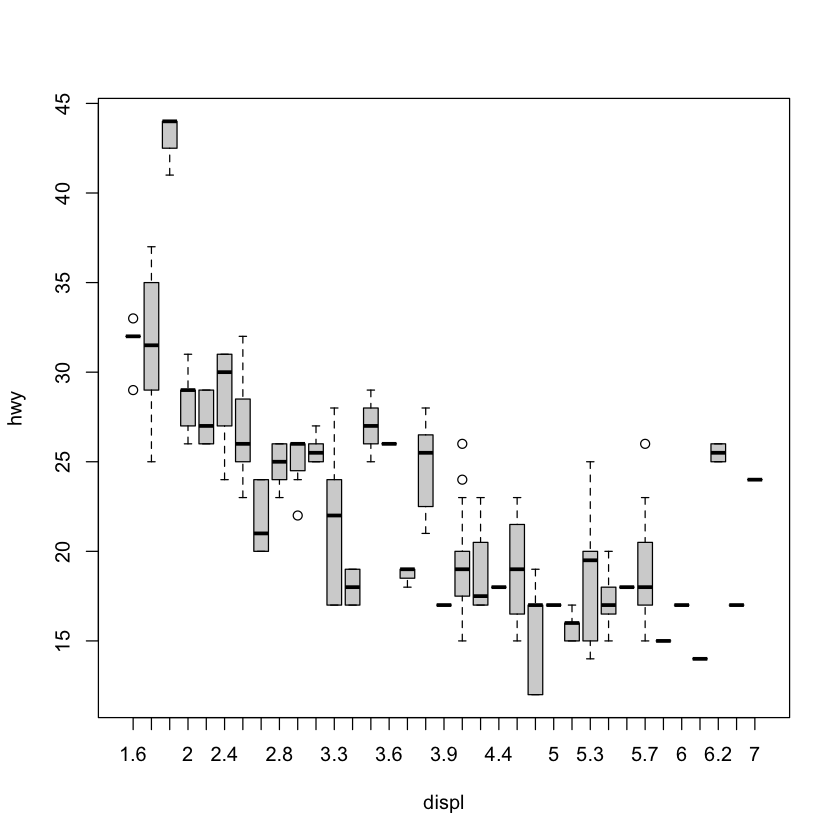

In [300]:
# boxplots of hwy grouped by displ
boxplot(hwy ~ displ, data = tab, xlab = "displ", ylab = "hwy")

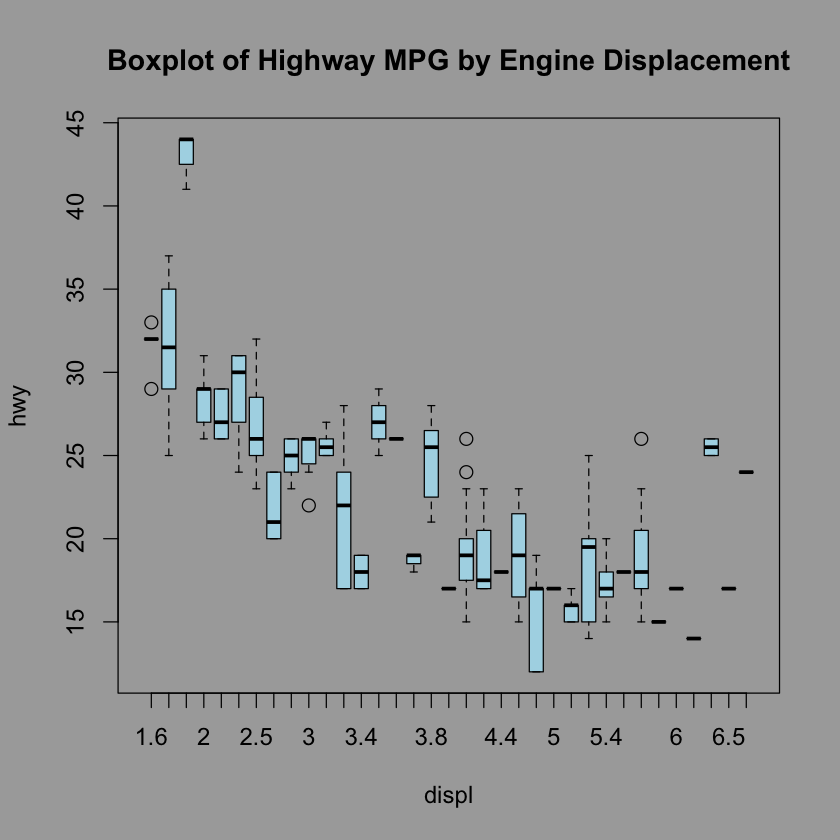

In [301]:
# Set the background color to dark grey
par(bg = "darkgrey")

# Increase the size of text and symbols
par(cex = 1.2)  # Adjust the value as needed

# Create the boxplot with customized background
boxplot(hwy ~ displ, data = tab, xlab = "displ", ylab = "hwy", 
        col = "lightblue",  # Set boxplot color
        border = "black",   # Set boxplot border color
        main = "Boxplot of Highway MPG by Engine Displacement")  # Add a title

# Reset the background color
par(bg = "white")

# Reset the size of text and symbols
par(cex = 1)  # Reset to default size (adjust as needed)


In [343]:
# Set the background color to dark grey
par(bg = "black")

# Open a larger plotting device (adjust width and height as needed)
pdf("boxplot_output.pdf", width = 10, height = 6)  # Output to PDF, adjust dimensions as needed

# Create the boxplot with customized background
boxplot(hwy ~ displ, data = tab, xlab = "displ", ylab = "hwy", 
        col = "lightblue",  # Set boxplot color
        border = "black",   # Set boxplot border color
        main = "Boxplot of Highway MPG by Engine Displacement")  # Add a title

# Close the plotting device
#dev.off()

# Reset the background color
#par(bg = "white")


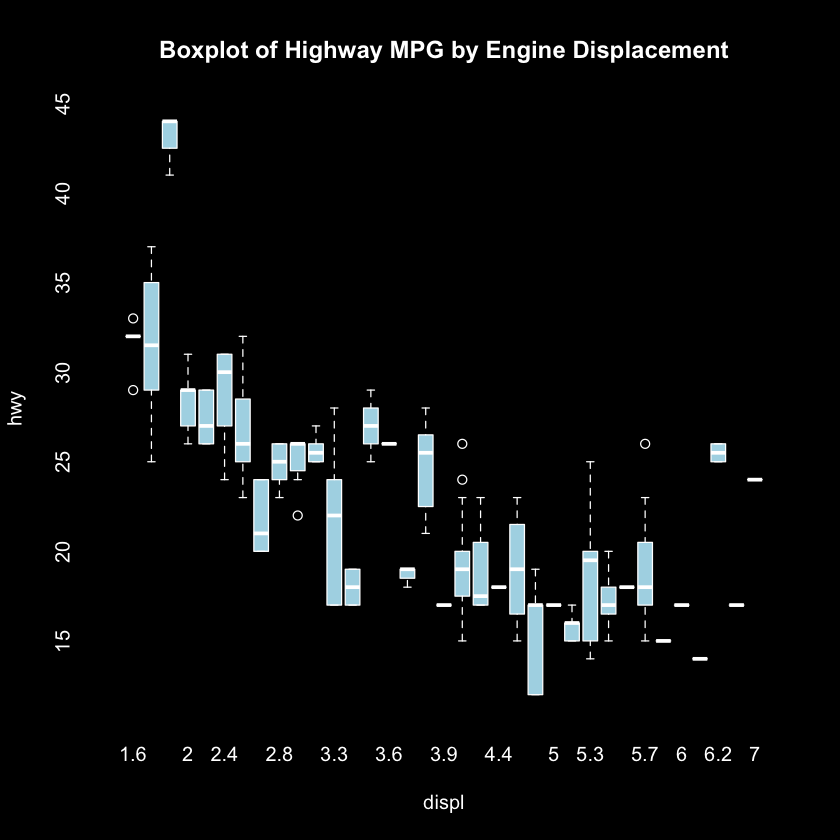

In [345]:
# Set the background color to dark grey
par(bg = "black", col.axis = "white", col.lab = "white", col.main = "white", col.sub = "white")

# Create the boxplot with customized background
boxplot(hwy ~ displ, data = tab, xlab = "displ", ylab = "hwy", 
        col = "lightblue",  # Set boxplot color
        border = "white",   # Set boxplot border color
        main = "Boxplot of Highway MPG by Engine Displacement")  # Add a title

# Reset the background color
par(bg = "white", col.axis = "black", col.lab = "black", col.main = "black", col.sub = "black")


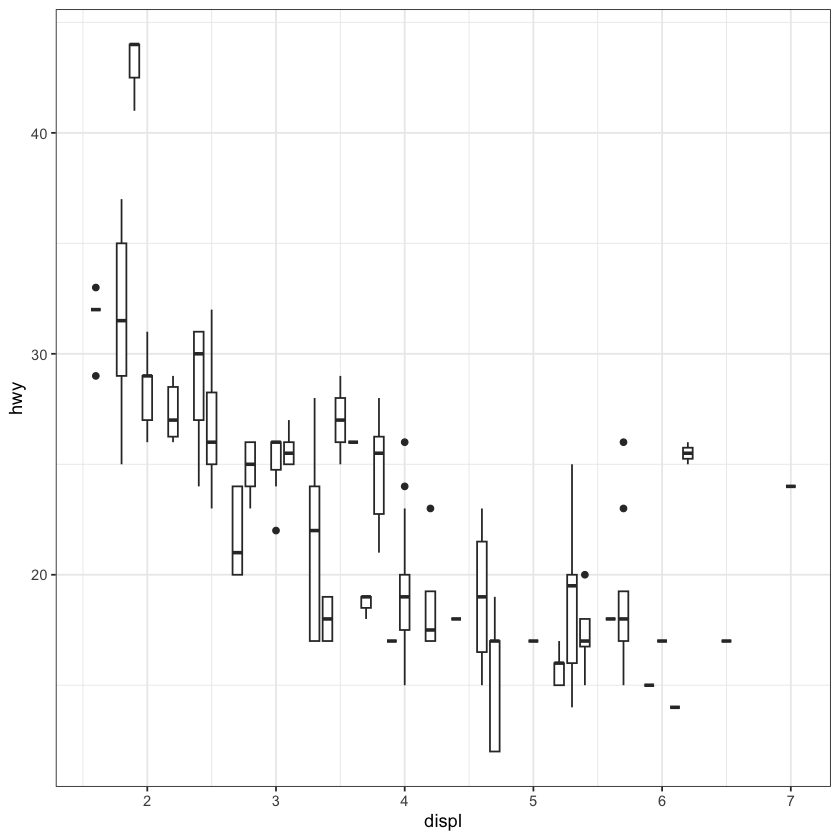

In [303]:
# using ggplot
ggplot(data = tab) +
  geom_boxplot(mapping = aes(group = displ, x = displ, y = hwy)) + 
  theme_bw()

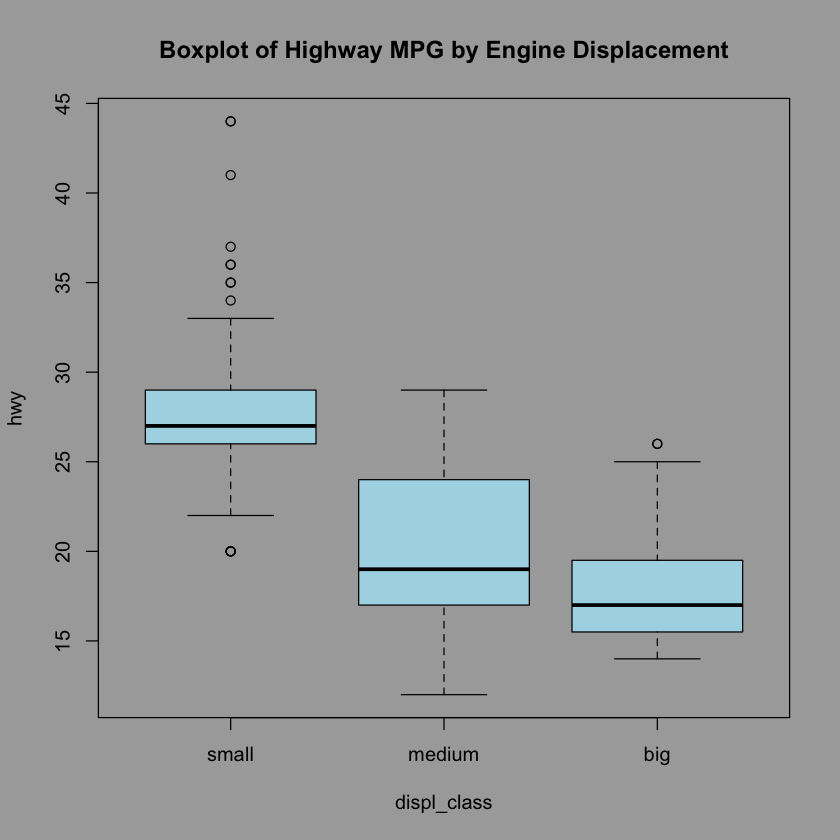

In [304]:
# Set the background color to grey
par(bg = "darkgrey")

# boxplots of hwy grouped by displ_class
boxplot(hwy ~ displ_class, data = tab, xlab = "displ_class", ylab = "hwy",
        col = "lightblue",  # Set boxplot color
        border = "black",   # Set boxplot border color
        main = "Boxplot of Highway MPG by Engine Displacement"  # Add a title
)

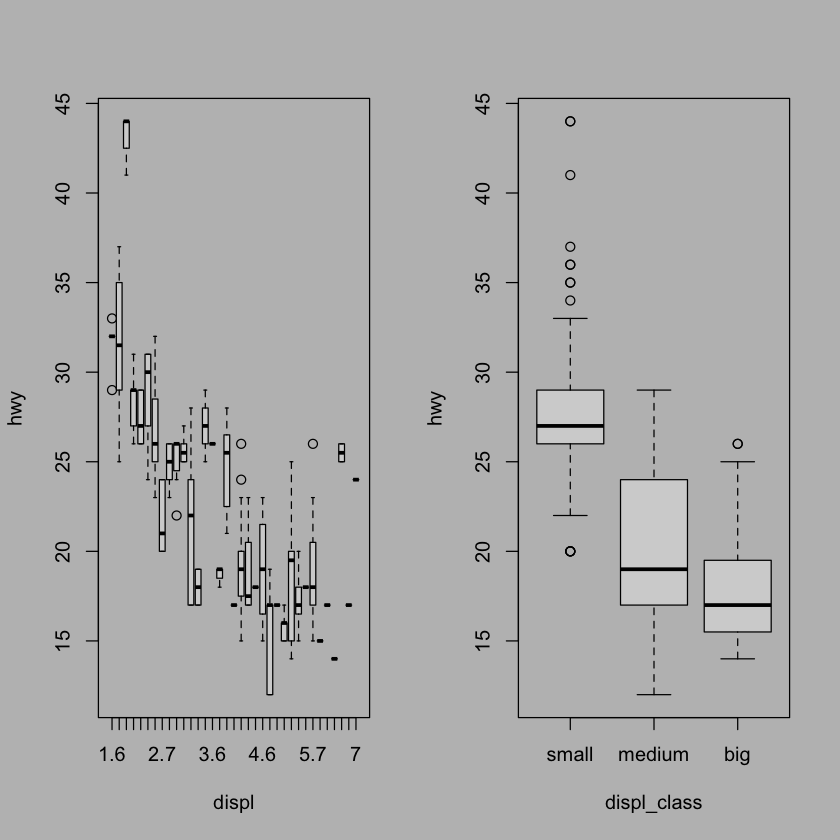

In [305]:

# both boxplots together
par(mfrow = c(1,2))
par(bg = "grey")
boxplot(hwy ~ displ, data = tab, xlab = "displ", ylab = "hwy")
boxplot(hwy ~ displ_class, data = tab, xlab = "displ_class", ylab = "hwy")
# zuruecksetzen von mfrow
par(mfrow = c(1,1))

In [306]:
# Solution
#
# File: des_stat_nat_el_sol.R
#
#####################################################

# Results of national elections applying tibbles
nat_el <- tibble(
  res.2013 = c(0.268,0.205,0.126,0.107,0.092,0.089,0.062,0.05),
  res.2017 = c(0.341,0.257,0.047,0.048,0.086,0.084,0.074,0.062),
  party = c("CDU","SPD","AFD","FDP","Die Linke","Gruene","CSU","Others"),
  diff = res.2017 - res.2013
)
nat_el

res.2013,res.2017,party,diff
<dbl>,<dbl>,<chr>,<dbl>
0.268,0.341,CDU,0.073
0.205,0.257,SPD,0.052
0.126,0.047,AFD,-0.079
0.107,0.048,FDP,-0.059
0.092,0.086,Die Linke,-0.006
0.089,0.084,Gruene,-0.005
0.062,0.074,CSU,0.012
0.050,0.062,Others,0.012


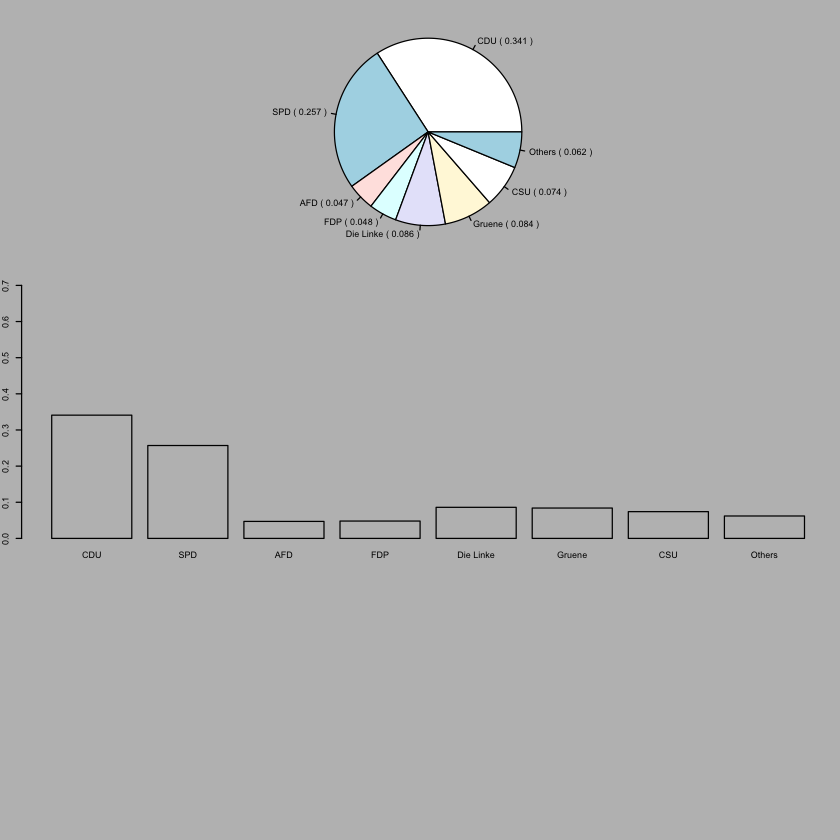

In [307]:
par(mar = c(2, 2, 0.5, 0.5), mfrow=c(3,1), cex = 0.45, bg = "grey")

# Plotting pie chart
pie(nat_el$res.2017, labels = paste(nat_el$party, "(", nat_el$res.2017, ")"))

# Plotting barplot
barplot(nat_el$res.2017, names.arg=nat_el$party,
        ylim=c(0,0.7), xlab="Parties",ylab="2017 Votes (%)")

res.2013,res.2017,party,diff
<dbl>,<dbl>,<chr>,<dbl>
0.268,0.341,CDU,0.073
0.205,0.257,SPD,0.052
0.126,0.047,AFD,-0.079
0.107,0.048,FDP,-0.059
0.092,0.086,Die Linke,-0.006
0.089,0.084,Gruene,-0.005
0.062,0.074,CSU,0.012
0.050,0.062,Others,0.012


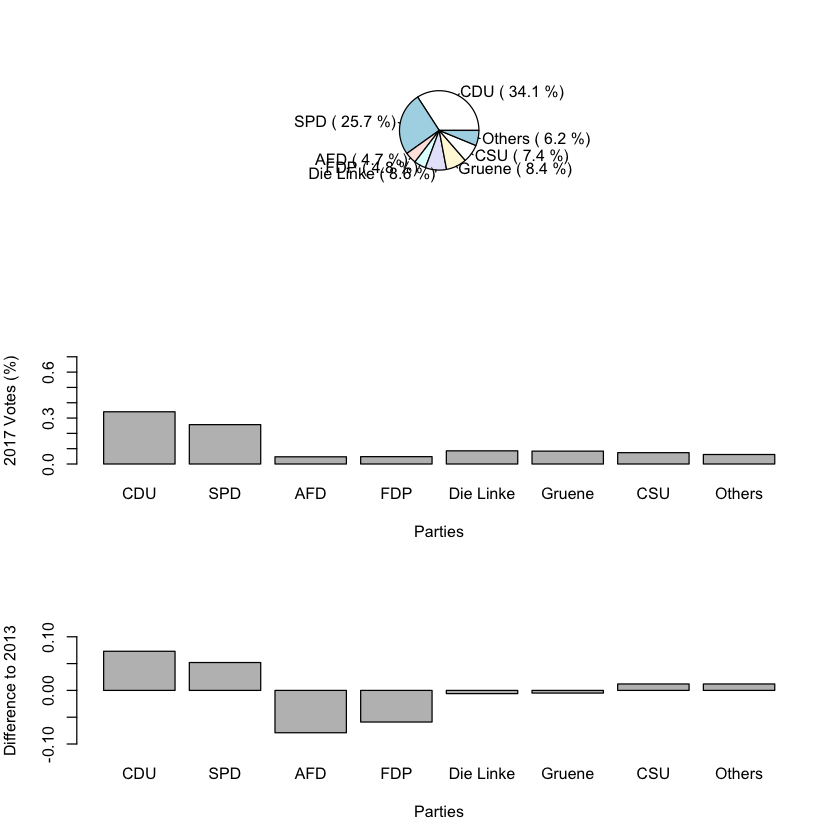

In [308]:
library(tidyverse)

# Results of national elections applying tibbles
nat_el <- tibble(
  res.2013 = c(0.268, 0.205, 0.126, 0.107, 0.092, 0.089, 0.062, 0.05),
  res.2017 = c(0.341, 0.257, 0.047, 0.048, 0.086, 0.084, 0.074, 0.062),
  party = c("CDU", "SPD", "AFD", "FDP", "Die Linke", "Gruene", "CSU", "Others"),
  diff = res.2017 - res.2013
)
nat_el

# Set up graphical parameters
par(mar = c(5, 4, 4, 2))  # Set margins
par(mfrow = c(3, 1))      # Set layout to have 3 rows and 1 column
par(cex = 0.8)             # Set text size magnification

# Plot 1: Pie chart for 2017 results
pie(nat_el$res.2017, labels = paste(nat_el$party, "(", round(nat_el$res.2017 * 100, 1), "%)"))

# Plot 2: Barplot for 2017 results
barplot(nat_el$res.2017, names.arg = nat_el$party,
        ylim = c(0, 0.7), xlab = "Parties", ylab = "2017 Votes (%)")

# Plot 3: Barplot for difference between 2017 and 2013 results
barplot(nat_el$diff, names.arg = nat_el$party,
        ylim = c(-0.1, 0.1),
        xlab = "Parties", ylab = "Difference to 2013")


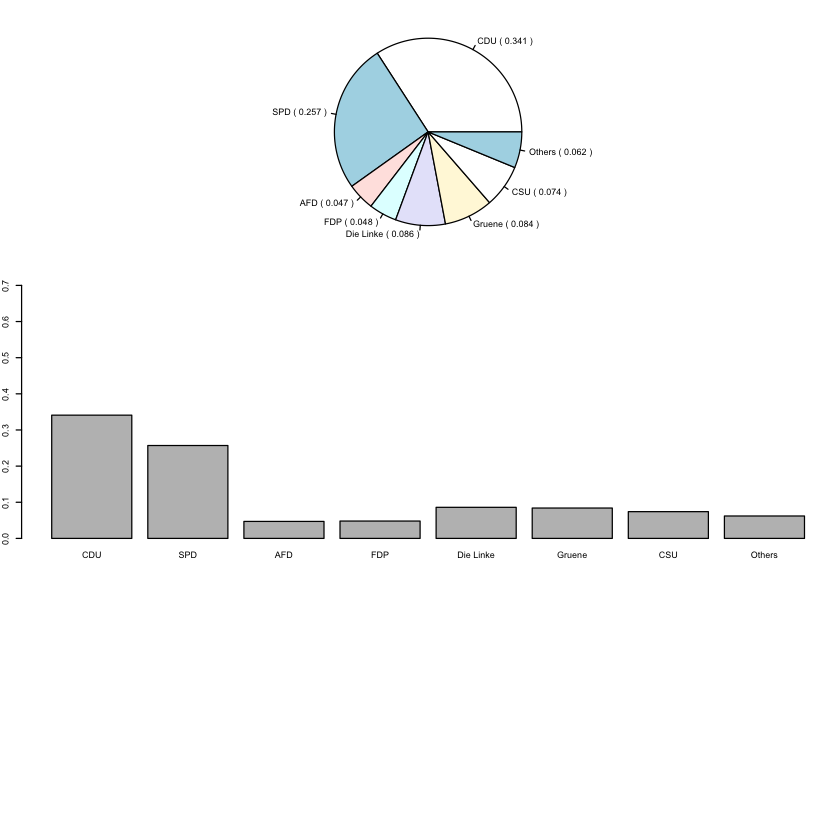

In [309]:
par(mar = c(2, 2, 0.5, 0.5), mfrow=c(3,1), cex = 0.45)

# Plotting pie chart
pie(nat_el$res.2017, labels = paste(nat_el$party, "(", nat_el$res.2017, ")"))

# Plotting barplot
barplot(nat_el$res.2017, names.arg=nat_el$party,
        ylim=c(0,0.7), xlab="Parties",ylab="2017 Votes (%)")


[**Explanation of par() from R Documentation**](https://www.rdocumentation.org/packages/graphics/versions/3.6.2/topics/par)


In [310]:
# diagrams with ggplot
# ggplot ordes the bars according to the alphabetic order of the x values, here party.
# The order can be changed by adding a factor to the variably party where the levels
# represents the newly defined order.
nat_el$party <- factor(nat_el$party, 
                       c("CDU","SPD","AFD","FDP","Die Linke","Gruene","CSU","Others"))


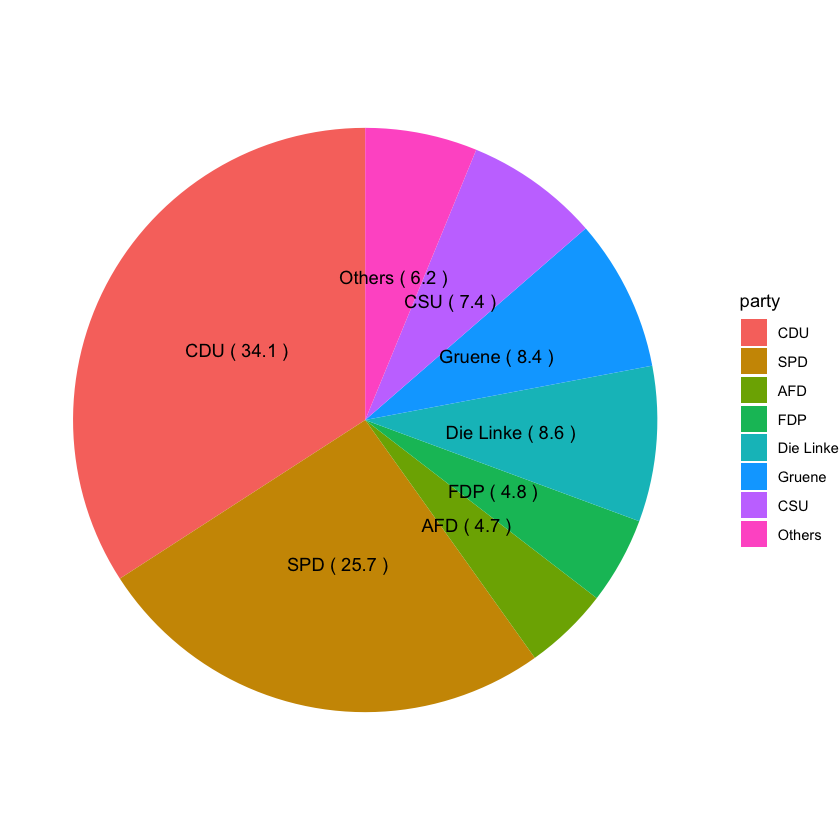

In [311]:
ggplot(data = nat_el, mapping = aes(x = "", y = res.2017, fill = party)) + 
  geom_col(width = 1) +
  coord_polar(theta = "y") + 
  geom_text(mapping = aes(label = paste(party,"(",res.2017*100,")")), 
            position = position_stack(vjust = 0.5)) +
  theme_void()


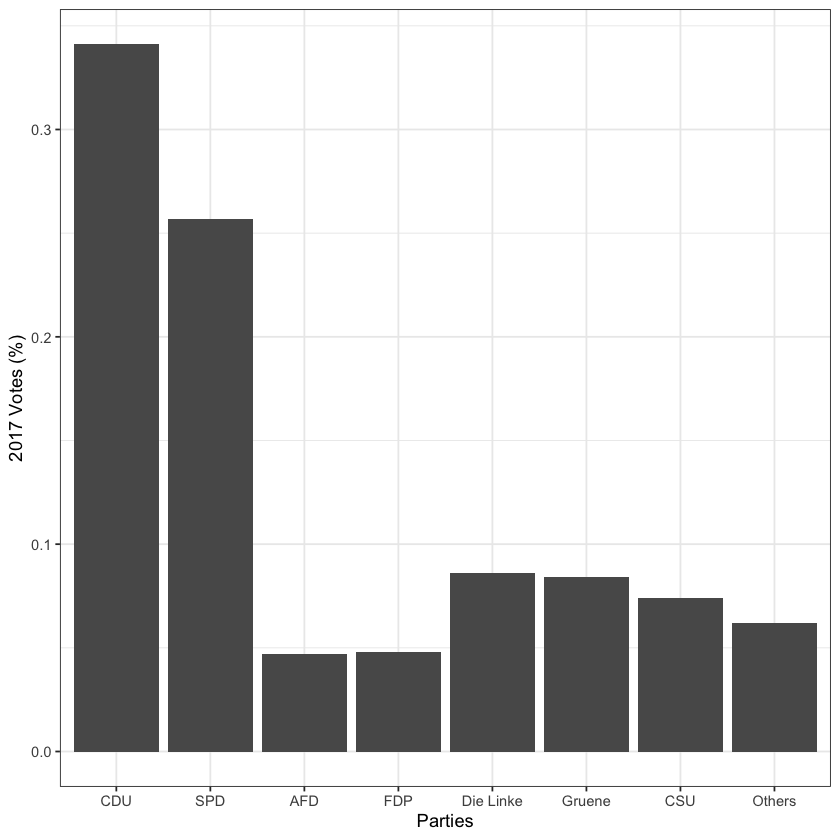

In [312]:
ggplot(data = nat_el) +
  geom_col(mapping = aes(x=party,y=res.2017)) +
  xlab("Parties")+
  ylab("2017 Votes (%)") +
  theme_bw()

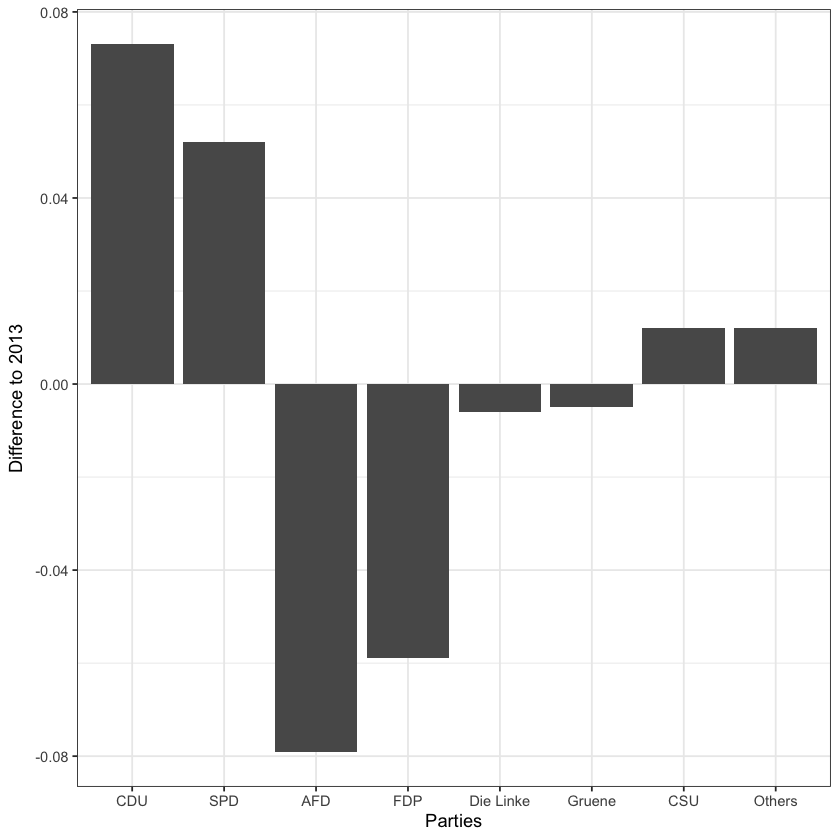

In [313]:
ggplot(data = nat_el) +
  geom_col(mapping = aes(x=party, y=diff)) +
  xlab("Parties")+
  ylab("Difference to 2013") +
  theme_bw()


In [314]:
# a) Generate a random sample of size n from 1, 2, ..., 20
# and determine the empirical distribution function

s.size <- 10
x <- sample(1:20, size = s.size, replace = TRUE)
emp.dist <- tibble(
  obs = x
) %>%
  count(obs) %>%
  mutate(
    cum.rel.freq = cumsum(n) / sum(n)
  )

In [315]:
emp.dist

obs,n,cum.rel.freq
<int>,<int>,<dbl>
5,1,0.1
6,1,0.2
7,1,0.3
9,1,0.4
10,1,0.5
17,3,0.8
18,1,0.9
20,1,1.0


In [316]:
x

[1] 10 17 17  7  9 20  6 18 17  5

In [317]:
#replace: allows the sample to have the same numbers appear more than once
#s.size <- 10
#x <- sample(1:8, size = s.size, replace = FALSE) #but it would work 1:10

In [318]:
#replace: allows the sample to have the same numbers appear more than once
s.size <- 10
x <- sample(1:10, size = s.size, replace = FALSE) #but it would work 1:10
x

[1]  9  4  3  1  6  7  2 10  5  8

In [319]:
# b) Determine a R function to find quantile according
# to the definition given in the lecture
my.quantile <- function(x,p) {
  x_sort <- sort(x)
  return(x_sort[ceiling(length(x)*p)])
}

In [320]:

# c) Compare the results of your quantile function with
# the results of the R function
my.quantile(x, seq(0,1, by=0.05))
quantile(x, probs = seq(0,1, by=0.05), type = 1)

[1]  1  1  2  2  3  4  4  4  5  5  6  7  7  8  8  8  9  9 10 10

0%   5%  10%  15%  20%  25%  30%  35%  40%  45%  50%  55%  60%  65%  70%  75% 
   1    1    1    2    2    3    4    4    4    5    5    6    7    7    8    8 
 80%  85%  90%  95% 100% 
   8    9    9   10   10

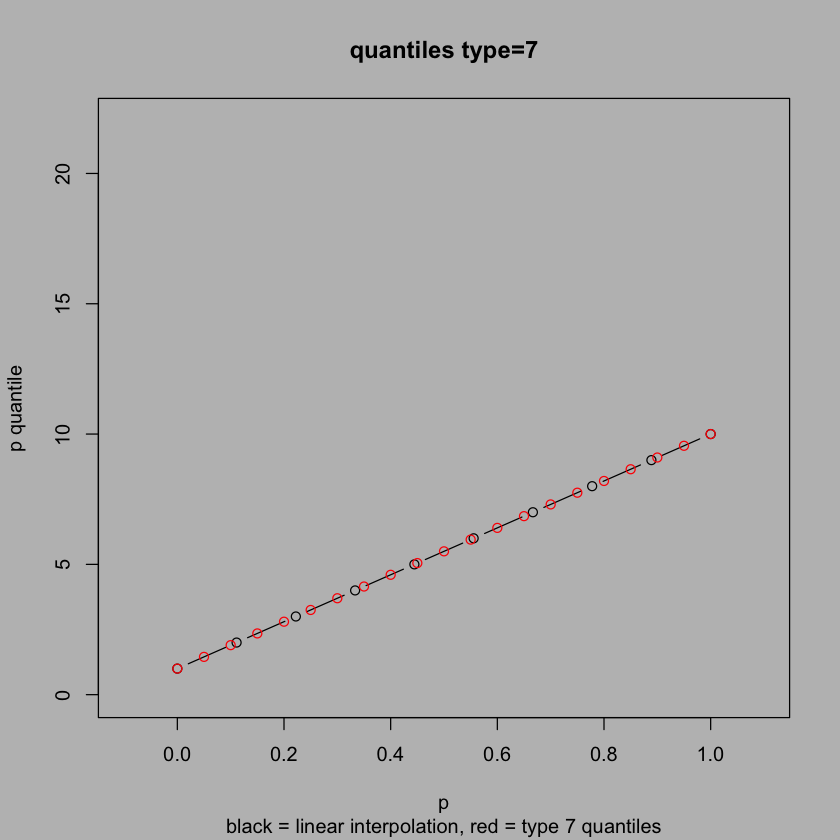

In [321]:

# d) The R function quantile() evaluates quantiles of type 7
# if no type is specified. Type 7 quantile are defined by a linear
# interpolation of the points
# (0, x_(1)), (1/(n-1),x_(2)), (2/(n-1),x_(3)), ..., (n/(n-1),x_(n))
# with n = sample size. Visualize the evalution by a diagram
# which contain these points, the linear interpolation and the
# R quantile of type 7 of order 0, 0.5, ..., 1
par(bg="grey")
plot(y=sort(x), x=(0:(s.size-1))/(s.size-1),
     type="b", col = "black",
     ylim=c(0,22), xlim=c(-0.1,1.1),
     xlab="p", ylab="p quantile",
     main="quantiles type=7",
     sub = "black = linear interpolation, red = type 7 quantiles")
points(x=seq(0,1, by=0.05), y=quantile(x,prob=seq(0,1, by=0.05)), col="red")


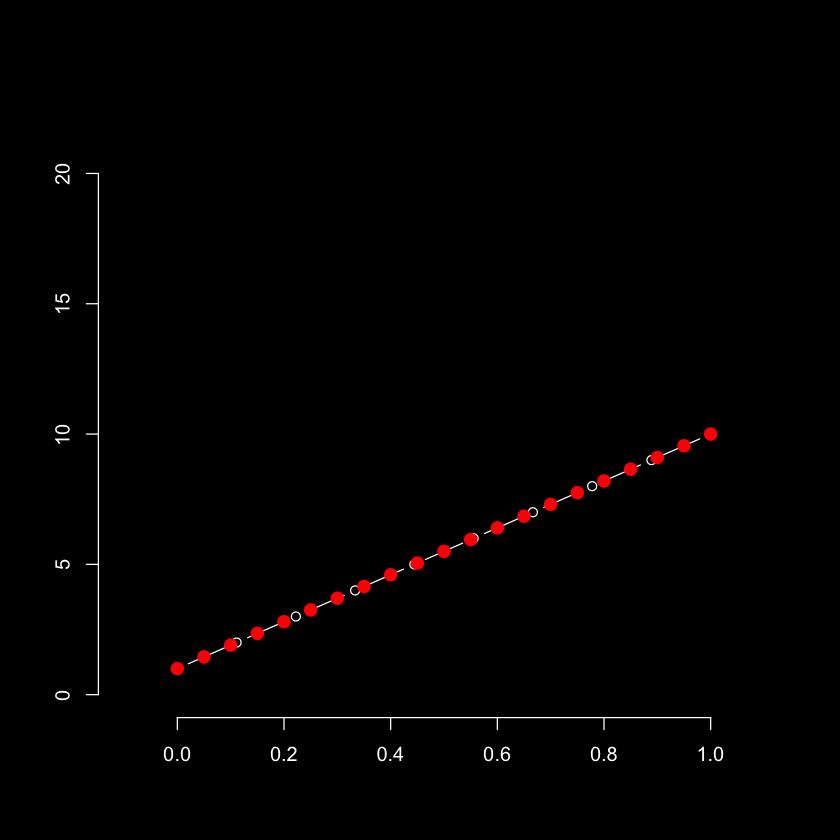

In [322]:
# Set the background color to black
par(bg = "black")

# Plot the points and linear interpolation with white lines
plot(y = sort(x), x = (0:(s.size-1))/(s.size-1),
     type = "b", col = "white",
     ylim = c(0, 22), xlim = c(-0.1, 1.1),
     xlab = "p", ylab = "p quantile",
     main = "Quantiles type=7",
     sub = "White = linear interpolation, red = type 7 quantiles",
     axes = FALSE)

# Add white axis lines, labels, tick marks, and text
axis(1, col = "white", col.ticks = "white", col.axis = "white")
axis(2, col = "white", col.ticks = "white", col.axis = "white")

# Plot the R quantiles of type 7 with thicker red dots
points(x = seq(0, 1, by = 0.05), y = quantile(x, prob = seq(0, 1, by = 0.05)), col = "red", pch = 16, cex = 1.5)


In [323]:
# e) Create a table containing the quantiles of type 1 and type 7 of order
# 0,0.01, ..., 0.99,1. What are the possible values of the quantiles?
q1.q7 <- tibble(
  p = seq(0,1,by=0.01),
  q1 = quantile(x, probs=p,type=1),
  q7 = quantile(x, probs=p,type=7)
)
# feasible value type 1: all sample values
# feasible values type 7: all values in the interval 
# [min(sample values, max(sample values)]

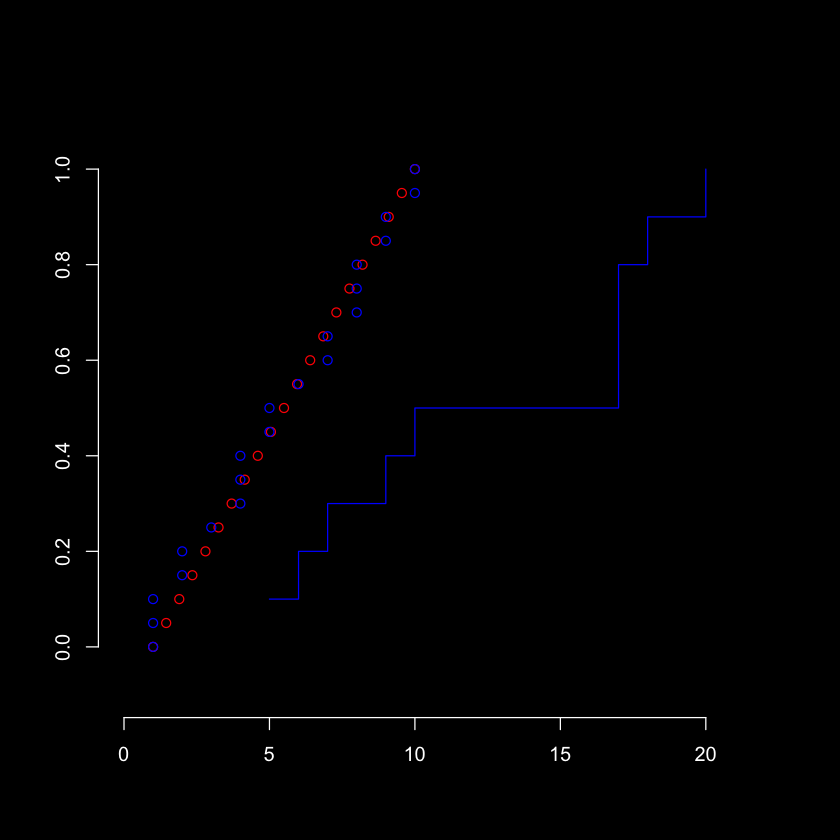

In [324]:

# f) Create a diagram which visualize the empirical distribution function,
# the function H, which connects the points
# (0, x_(1)), (1/(n-1),x_(2)), (2/(n-1),x_(3)), ..., (n/(n-1),x_(n))
# with line segments (the above linear interpolation), type 1 and type 7
# quantiles and mention the difference between type 1 and type 7 quantiles.
par(bg="black")
plot(x=sort(x), y=(0:(s.size-1))/(s.size-1),
     type="b", col = "black",
     xlim=c(0,22), ylim=c(-0.1,1.1),
     ylab="p", xlab="x",
     main="Comparison of type 1 and 7",
     sub = "black = type 7, blue = type 1")
points(y=seq(0,1, by=0.05), x=quantile(x,prob=seq(0,1, by=0.05), type=7), col="red")
points(y=seq(0,1, by=0.05), x=quantile(x,prob=seq(0,1, by=0.05), type=1), col="blue")

# Add white axis lines, labels, tick marks, and text
axis(1, col = "white", col.ticks = "white", col.axis = "white")
axis(2, col = "white", col.ticks = "white", col.axis = "white")

lines(x=emp.dist$obs, y=emp.dist$cum.rel.freq, type="s",col="blue")


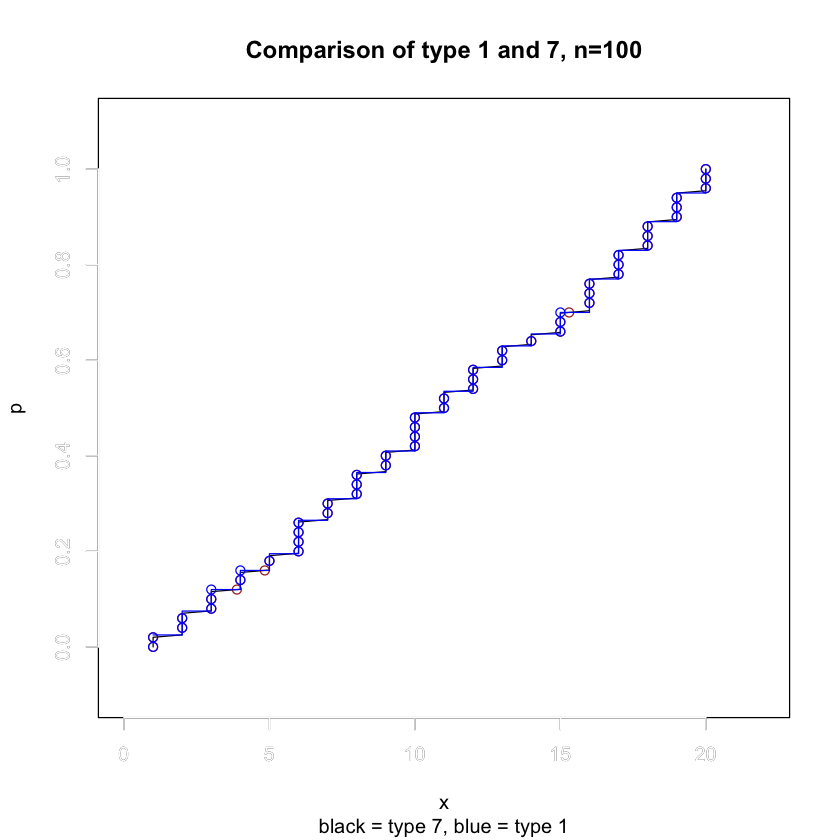

In [325]:

# g) Increase the sample size from 10 to 50 and then to 100 and create 
# the above diagram. What happens?
s.size <- 200
x <- sample(1:20, size = s.size, replace = TRUE)
emp.dist <- tibble(
  obs = x
) %>%
  count(obs) %>%
  mutate(
    cum.rel.freq = cumsum(n)/sum(n)
  ) 
plot(x=sort(x), y=(0:(s.size-1))/(s.size-1),
     type="l", col = "black",
     xlim=c(0,22), ylim=c(-0.1,1.1),
     ylab="p", xlab="x",
     main="Comparison of type 1 and 7, n=100",
     sub = "black = type 7, blue = type 1")

points(y=seq(0,1, by=0.02), x=quantile(x,prob=seq(0,1, by=0.02), type=7), col="brown")
points(y=seq(0,1, by=0.02), x=quantile(x,prob=seq(0,1, by=0.02), type=1), col="blue")

axis(1, col = "white", col.ticks = "white", col.axis = "white")
axis(2, col = "white", col.ticks = "white", col.axis = "white")

lines(x=emp.dist$obs, y=emp.dist$cum.rel.freq, type="s",col="blue")

# Observations
# a) The deviations between the empirical distribution function F and the 
# function H decrease. For big sample sizes both function are more or less
# identical.
# b) The feasible values of type 1 quantiles are {1,2,...20} whereas
# quantiles of type 7 can take every value from the interval [1,20].
# c) Type 1 quantiles are suited for discrete variables. In case of continous 
# variables both types can be used and exspecially for large sample sizes the
# values are more or less identical.

In [326]:
#####################################################
# Descriptive Statistics: Returns of a portfolio
# Solution
#
# File: des_stat_returns_sol.R
#
#####################################################
# Consider a stock portfolio that began with a value 
# of 1000 and had annual returns of 13%, 22%, 12%, -5%, 
# and -13%.
# a) Compute the value after each of the five years.
x <- 1000
ret <- c(0.13,0.22,0.12,-0.05,-0.13)
value <- 1000 * cumprod(1+ret)
value

[1] 1130.000 1378.600 1544.032 1466.830 1276.142

In [327]:

# Compute the annual rate of return.
annual_rate <-  (prod(1+ret)^0.2 -1)*100
annual_rate

[1] 4.997711

In [328]:

# wrong annual rate
mean(ret)
# value after 5 years using wrong.rate
1000*(1+mean(ret))**5

[1] 0.058

[1] 1325.648

In [329]:

#  4.997711
# expected return after year 6
value[5]* (1+annual_rate/100)
# expected return after year 7
value[5]* (1+annual_rate/100)**2


[1] 1339.92

[1] 1406.886

In [330]:
#####################################################
# Descriptive Statistics: Times to move the mouse
# Solution
#
# File: des_stat_time_mouse_sol.R
#
#####################################################
library(tidyverse)

# 4) The data shown in the list are the times in
# milliseconds it took one of us to move the mouse
# over a small target in a series of 20 trials.
# The times are sorted from shortest to longest.

times <- c(568, 577, 581, 640, 641, 645, 657, 673, 696,
           703, 720, 728, 729, 777, 808, 824, 825, 865,
           975, 1007, 1007)

In [331]:
#####################################################
# ungrouped data                                    #
#####################################################
# solution applying count()
df <- tibble(values = times) %>%
  # count the number of observations per observed value
  count(values) %>%
  mutate(
    abs.freq = n, #n is automatically generated
    rel.freq = abs.freq / sum(abs.freq),
    cum.rel.freq = cumsum(rel.freq)
  ) %>%
  select(-n)
df

values,abs.freq,rel.freq,cum.rel.freq
<dbl>,<int>,<dbl>,<dbl>
568,1,0.04761905,0.04761905
577,1,0.04761905,0.09523810
581,1,0.04761905,0.14285714
640,1,0.04761905,0.19047619
641,1,0.04761905,0.23809524
645,1,0.04761905,0.28571429
657,1,0.04761905,0.33333333
673,1,0.04761905,0.38095238
696,1,0.04761905,0.42857143


In [332]:
# c) Compute the proportion of response times
# less equal 800
H(800) # 0.7
# greater than 725
1-H(725) # 0.45
# greater than 642 and less equal 777
H(777) - H(642) # 0.45
# equal 696 --> Grenzwert
# H(696) - H(695) # 0.05
sum(df$values == 696)/length(df$values)
# in [698, 800]
H(800)-H(696)+sum(df$values == 696)/length(df$values)


[1] 0.6666667

[1] 0.4761905

[1] 0.4285714

[1] 0.05

[1] 0.2880952

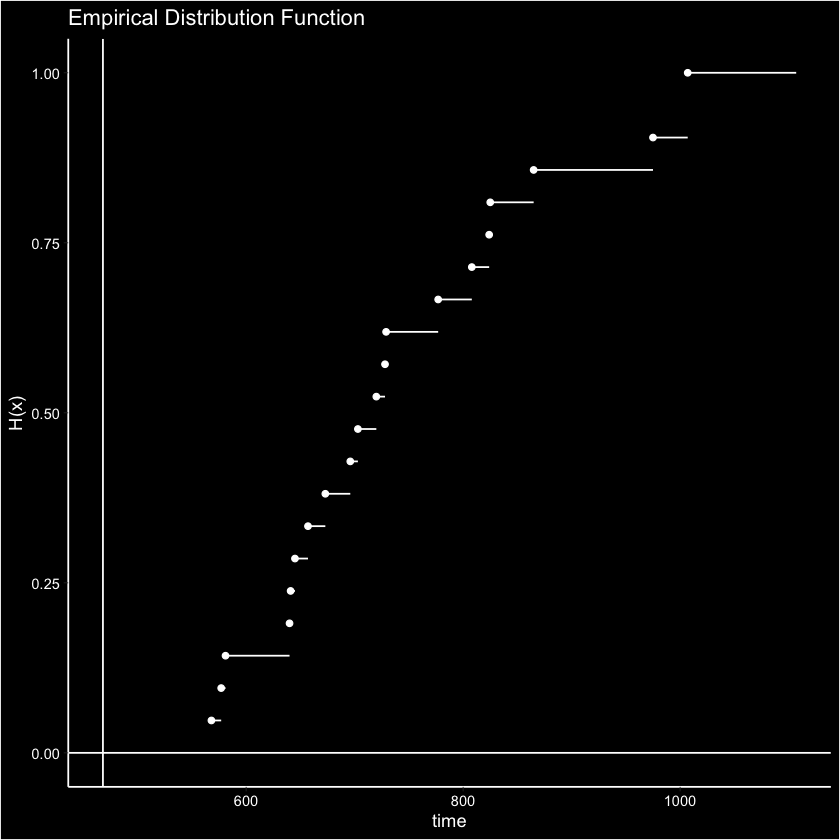

In [333]:
# Plot the empirical distribution function with ggplot()
ggplot(data = df %>% 
         mutate(x1 = values, x2 = c(values[-1], 100 + max(values)))) +
  geom_point(mapping = aes(x = values, y = cum.rel.freq), color = "white") + 
  geom_segment(mapping = aes(x = x1, y = cum.rel.freq, 
                             xend = x2, yend = cum.rel.freq), color = "white") + 
  geom_hline(yintercept = 0, color = "white") + 
  geom_vline(xintercept = min(df$values) - 100, color = "white") +
  xlab("time") +
  ylab("H(x)") +
  ggtitle("Empirical Distribution Function") +
  theme_dark() +
  theme(
    panel.background = element_rect(fill = "black"),
    plot.background = element_rect(fill = "black"),
    axis.line = element_line(color = "white"),
    axis.text = element_text(color = "white"),
    axis.title = element_text(color = "white"),
    plot.title = element_text(color = "white"),
    plot.subtitle = element_text(color = "white"),
    panel.grid = element_blank()
  )

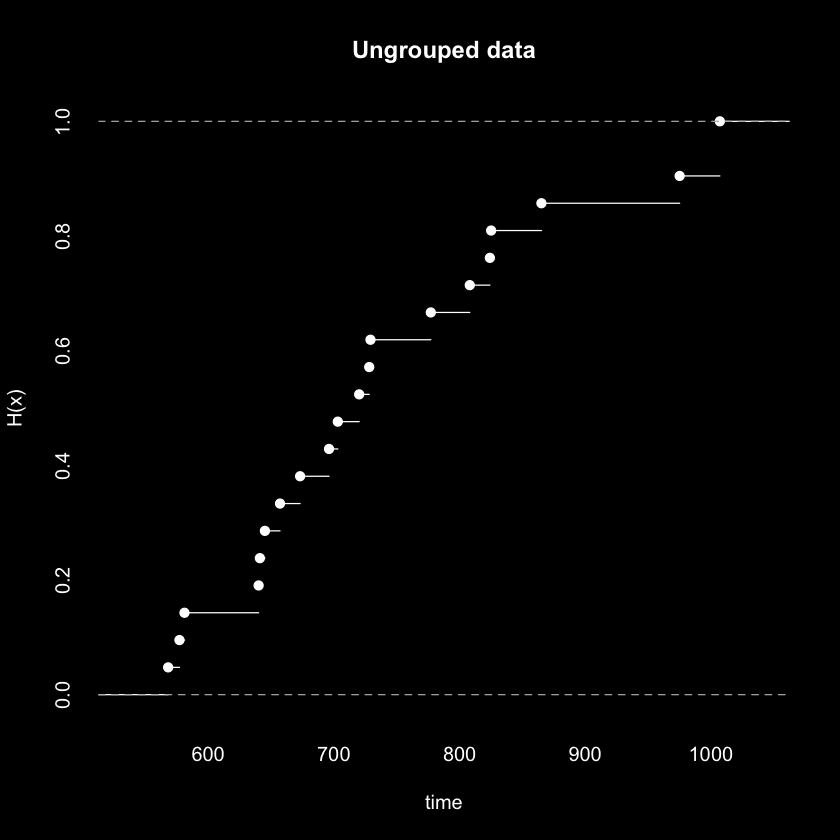

In [334]:
# Set the background color to black
par(bg = "black", col.axis = "white", col.lab = "white")

# Empirical cumulative distribution function using ecdf() and plot.ecdf()
plot.ecdf(times,
          xlab = "time", ylab = "H(x)",
          main = "Ungrouped data",
          col.axis = "white", col.lab = "white", col.main = "white", col = "white")


In [335]:
display_html("
<p>In R, <code>ecdf()</code> is a function used to compute the empirical cumulative distribution function (ECDF) of a given dataset. ECDF is a non-parametric estimator of the cumulative distribution function of a random variable based on the observed data.</p>

<p>When you call <code>H <- ecdf(times)</code>, it calculates the ECDF of the data stored in the <code>times</code> vector and stores it in the variable <code>H</code>. The resulting object <code>H</code> is a function that you can use to evaluate the cumulative distribution function (CDF) at specific points or to plot the empirical cumulative distribution function.</p>

<p>For example, if you want to evaluate the ECDF at a specific value, say <code>700</code>, you can simply call <code>H(700)</code> and it will return the cumulative probability associated with that value based on the observed data.</p>

<p>Here's an example:</p>

<pre>
<code>
times <- c(568, 577, 581, 640, 641, 645, 657, 673, 696, 
           703, 720, 728, 729, 777, 808, 824, 825, 865,
           975, 1007, 1007)

H <- ecdf(times)

# Evaluate the ECDF at 700
H(700)
</code>
</pre>
")


In R, ecdf() is a function used to compute the empirical cumulative distribution function (ECDF) of a given dataset. ECDF is a non-parametric estimator of the cumulative distribution function of a random variable based on the observed data. 

 When you call H <- ecdf(times) , it calculates the ECDF of the data stored in the times vector and stores it in the variable H . The resulting object H is a function that you can use to evaluate the cumulative distribution function (CDF) at specific points or to plot the empirical cumulative distribution function. 

 For example, if you want to evaluate the ECDF at a specific value, say 700 , you can simply call H(700) and it will return the cumulative probability associated with that value based on the observed data. 

 Here's an example: 

 
 
times <- c(568, 577, 581, 640, 641, 645, 657, 673, 696, 
 703, 720, 728, 729, 777, 808, 824, 825, 865,
 975, 1007, 1007)

H <- ecdf(times)

# Evaluate the ECDF at 700
H(700)

In [336]:

#####################################################
# grouped data: different class widths              #
#####################################################
# Consider the following classes 
# (500,600],(600,900],(900,1100]
# classbounds:
bounds <- c(500,600,900,1100)
times_cut <- cut(times, breaks = bounds,
                 # labels denotes the names of values
                 # here: value = upper bound of the class
                 labels = bounds[-1])
times_cut

[1] 600  600  600  900  900  900  900  900  900  900  900  900  900  900  900 
[16] 900  900  900  1100 1100 1100
Levels: 600 900 1100

In [337]:
# cut(times, breaks = bounds) # labels are the classes (a,b]

df_cut_diff <-
  tibble(upper_bound = 
           # convert factor times cut to numeric
           times_cut %>% as.character() %>% as.numeric()) %>%
  count(upper_bound) %>%
  mutate(rel = n / length(times),
         cum.rel.freq = cumsum(rel))
df_cut_diff

upper_bound,n,rel,cum.rel.freq
<dbl>,<int>,<dbl>,<dbl>
600,3,0.1428571,0.1428571
900,15,0.7142857,0.8571429
1100,3,0.1428571,1.0000000


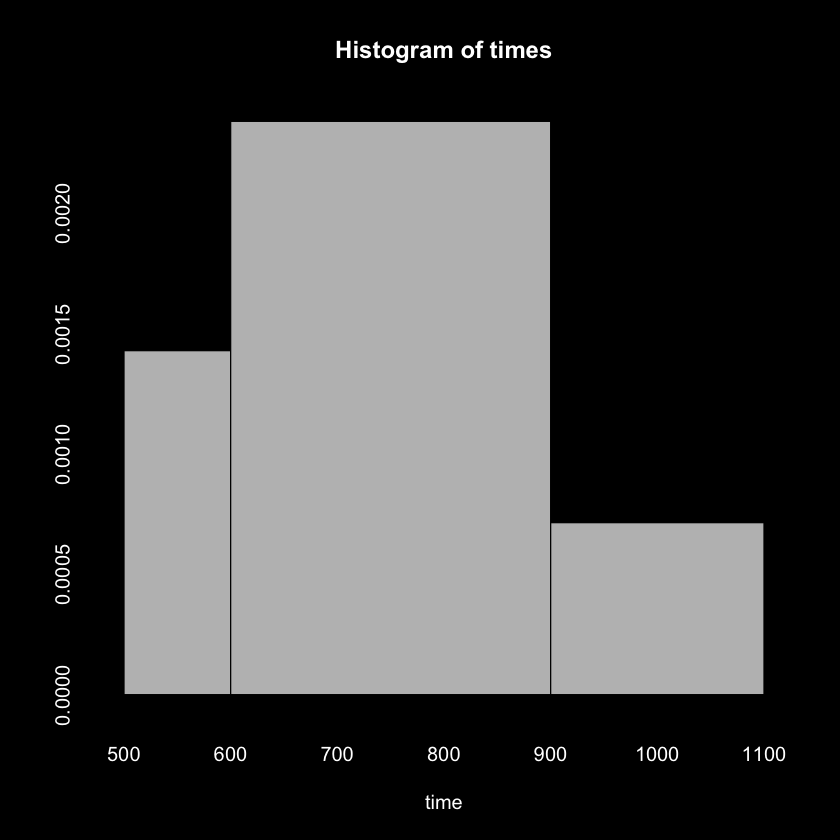

In [338]:
# Set the background color to black
par(bg = "black", col.axis = "white", col.lab = "white")

# Histogram with black background and white labels
hist(times, breaks = bounds, xlab = "time", ylab ="", col = "grey")

# Set the title color to white
title(main = "Histogram of times", col.main = "white")

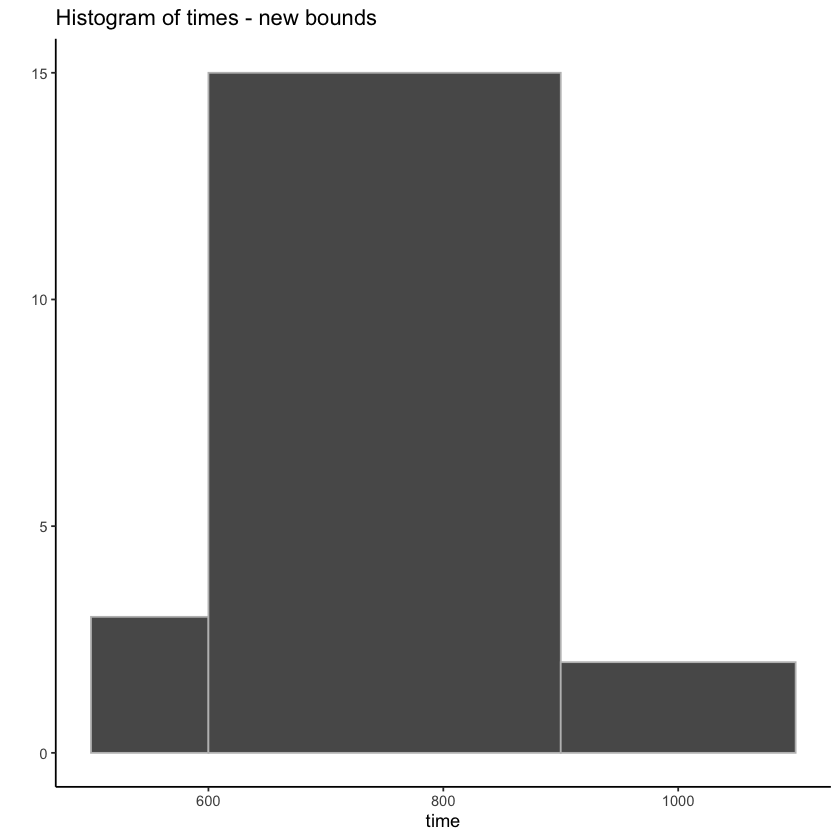

In [339]:

# histogram applying ggplot()
ggplot(data = df) +
  geom_histogram(mapping = aes(x = values), breaks = bounds, 
                 color = "grey") + 
  theme_classic() +
  ggtitle("Histogram of times - new bounds") +
  xlab("time") +
  ylab("")

# Since the class widths are not equal, there is non meaning full interpretation 
# of the y-values.

In [340]:

# solution applying count()
df_cut <- 
  tibble(upper_bound = 
           # convert factor times cut to numeric
           times_cut %>% as.character() %>% as.numeric()) %>%
  count(upper_bound) %>%
  mutate(rel = n / length(times_cut),
         cum.rel.freq = cumsum(rel))

df_cut_diff <-
  tibble(upper_bound = 
           # convert factor times cut to numeric
           times_cut %>% as.character() %>% as.numeric()) %>%
  count(upper_bound) %>%
  mutate(rel = n / length(times),
         cum.rel.freq = cumsum(rel))

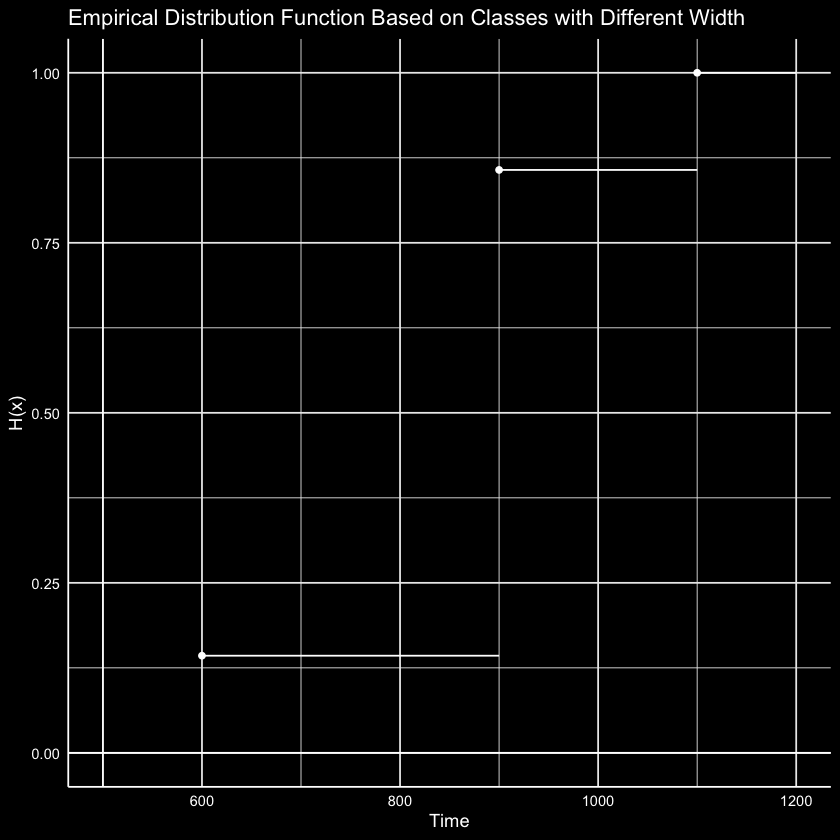

In [341]:
# Plot the distribution function with ggplot()
ggplot(data = df_cut_diff %>% 
         mutate(x1 = upper_bound, x2 = c(upper_bound[-1], 100 + max(upper_bound)))) +
  geom_point(mapping = aes(x = upper_bound, y = cum.rel.freq), color = "white") +
  geom_segment(mapping = aes(x = x1, y = cum.rel.freq, xend = x2, yend = cum.rel.freq), color = "white") +
  geom_hline(yintercept = 0, color = "white") +
  geom_vline(xintercept = min(df_cut_diff$upper_bound) - 100, color = "white") +
  xlab("Time") +
  ylab("H(x)") +
  ggtitle("Empirical Distribution Function Based on Classes with Different Width") +
  theme_minimal() +
  theme(
    plot.background = element_rect(fill = "black"),
    panel.background = element_rect(fill = "black"),
    axis.line.x = element_line(color = "white"),
    axis.line.y = element_line(color = "white"),
    axis.text = element_text(color = "white"),
    axis.title = element_text(color = "white"),
    plot.title = element_text(color = "white")
  )


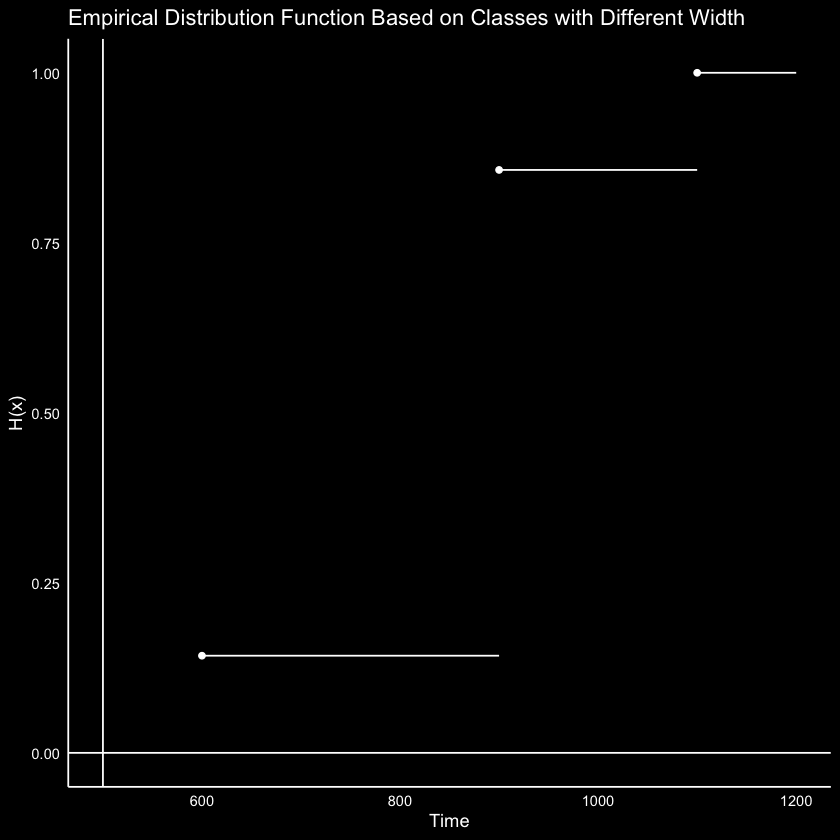

In [342]:
# Plot the distribution function with ggplot()
ggplot(data = df_cut_diff %>% 
         mutate(x1 = upper_bound, x2 = c(upper_bound[-1], 100 + max(upper_bound)))) +
  geom_point(mapping = aes(x = upper_bound, y = cum.rel.freq), color = "white") +
  geom_segment(mapping = aes(x = x1, y = cum.rel.freq, xend = x2, yend = cum.rel.freq), color = "white") +
  geom_hline(yintercept = 0, color = "white") +
  geom_vline(xintercept = min(df_cut_diff$upper_bound) - 100, color = "white") +
  xlab("Time") +
  ylab("H(x)") +
  ggtitle("Empirical Distribution Function Based on Classes with Different Width") +
  theme_minimal() +
  theme(
    panel.grid = element_blank(),  # Remove all grid lines
    axis.line = element_line(color = "white"),  # Set axis lines to white
    axis.text = element_text(color = "white"),  # Set axis text to white
    axis.title = element_text(color = "white"), # Set axis titles to white
    plot.title = element_text(color = "white"), # Set plot title to white
    plot.background = element_rect(fill = "black"), # Set plot background to black
    panel.background = element_rect(fill = "black")  # Set panel background to black
  )
